## parameter and subject info


In [1]:
# import and parameters
from __future__ import division
import warnings
warnings.filterwarnings('ignore')
import csv
import pandas as pd
import numpy as np
import os
import glob
import statistics
import scipy
from statistics import mean, stdev
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from numpy import nanmean, nanstd
import pandas as pd
from statsmodels.stats.anova import AnovaRM
import pingouin as pg
from IPython.display import display, HTML


folder = {'resultsfolder': '/Users/chendanlei/Google Drive/Predictive Affect Experiment/piloting analysis for pair/results',
          'designfolder': '/Users/chendanlei/Google Drive/Predictive Affect Experiment/piloting analysis for pair/design results',
          'scriptfolder': '/Users/chendanlei/Google Drive/Predictive Affect Experiment/piloting analysis for pair/',
          'csvfolder': '/Users/chendanlei/Google Drive/Predictive Affect Experiment/piloting analysis for pair/rmANOVA_csv_output'}

param = {'num_examplars_structured': 6}
param['NN_pairs'] = param['num_examplars_structured']
param['NB_pairs'] = param['num_examplars_structured']
param['BN_pairs'] = param['num_examplars_structured']
param['BB_pairs'] = param['num_examplars_structured']
param['num_examplars_unstructured'] = 1
param['NN_rand_pairs'] = param['num_examplars_unstructured']
param['BN_rand_pairs'] = param['num_examplars_unstructured']
param['BB_rand_pairs'] = param['num_examplars_unstructured']
param['total_rand_pairs'] = param['NN_rand_pairs'] + \
    param['BN_rand_pairs']+param['BB_rand_pairs']
param['pair_types'] = 7
param['rep_per_block'] = 3
param['num_blocks'] = 6


param['total_pairs'] = param['NN_pairs']+param['NB_pairs']+param['BN_pairs'] + \
    param['BB_pairs']+param['NN_rand_pairs'] + \
    param['BN_rand_pairs']+param['BB_rand_pairs']
param['total_structured_pairs'] = param['NN_pairs'] + \
    param['NB_pairs']+param['BN_pairs']+param['BB_pairs']
param['total_unstructured_pairs'] = param['NN_rand_pairs'] + \
    param['BN_rand_pairs']+param['BB_rand_pairs']
param['total_structured_stimuli'] = 2*param['total_structured_pairs']
param['total_unstructured_stimuli'] = 2*param['total_unstructured_pairs']
param['total_stimuli'] = 2*param['total_pairs']
param['total_negstim'] = param['NN_pairs']*0+param['NB_pairs']*1+param['BN_pairs']*1 + \
    param['BB_pairs']*2+param['NN_rand_pairs']*0 + \
    param['BN_rand_pairs']*1+param['BB_rand_pairs']*2
param['total_neustim'] = param['NN_pairs']*2+param['NB_pairs']*1+param['BN_pairs']*1 + \
    param['BB_pairs']*0+param['NN_rand_pairs']*2 + \
    param['BN_rand_pairs']*1+param['BB_rand_pairs']*0

param['total_pairs'] = param['NN_pairs']+param['NB_pairs']+param['BN_pairs'] + \
    param['BB_pairs']+param['NN_rand_pairs'] + \
    param['BN_rand_pairs']+param['BB_rand_pairs']
param['total_structured_pairs'] = param['NN_pairs'] + \
    param['NB_pairs']+param['BN_pairs']+param['BB_pairs']
param['total_unstructured_pairs'] = param['NN_rand_pairs'] + \
    param['BN_rand_pairs']+param['BB_rand_pairs']
param['total_structured_stimuli'] = 2*param['total_structured_pairs']
param['total_unstructured_stimuli'] = 2*param['total_unstructured_pairs']
param['total_stimuli'] = 2*param['total_pairs']
param['total_negstim'] = param['NN_pairs']*0+param['NB_pairs']*1+param['BN_pairs']*1 + \
    param['BB_pairs']*2+param['NN_rand_pairs']*0 + \
    param['BN_rand_pairs']*1+param['BB_rand_pairs']*2
param['total_neustim'] = param['NN_pairs']*2+param['NB_pairs']*1+param['BN_pairs']*1 + \
    param['BB_pairs']*0+param['NN_rand_pairs']*2 + \
    param['BN_rand_pairs']*1+param['BB_rand_pairs']*0

param['trials_per_block'] = param['total_stimuli'] * param['rep_per_block']
param['total_rep'] = param['rep_per_block'] * param['num_blocks']



In [2]:
# subj
# param['num_sessions'] = 4
# subj = ['0069','0071','0072','0070']
param['num_sessions'] = 1
subj = ['0069', '0070', '0071', '0072',
        '0065', '0066', '0067', '0073', '0074', '0075', '0078', '0080', '0081', '0082', '0083',
        '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0094', '0095',
        '0097', '0100', '0101', '0103', '0104', '0106', '0107', '0108', '0109',
        '0110', '0111', '0113', '0114', '0115', '0116', '0117', '0118', '0120', '0121', '0122',
        '0125', '0126', '0130', '0131', '0132', '0133', '0136']

# #with explicit awareness for at least one pair
sl_subj = ['0069', '0070', '0071', '0072',
        '0092','0088','0085','0083','0080','0075',
        '0074','0065','0066','0089','0086','0078','0108',
        '0107','0113','0115','0116','0131','0095',
        '0132','0109','0110']
#ambiguous: 0132,0085,0075,0074
#1 pair:    0109,0070,0107,0108,0095,0088,0083
#2 pairs:   0089,0086,0078,0066,0071,0131,0113,0080
#3 pairs:   0110,0116,0115,0092
#> 3 pairs: 0065,0069,0072,
# #without explicit awareness
nosl_subj = ['0067','0073','0081','0082','0084','0090',
             '0091','0087','0094','0097',
             '0100','0101','0103','0104','0106','0111',
             '0114','0121','0122','0130','0126','0125',
             '0118','0117','0133','0120']
# subj = ['0067','0097','0106','0111','0121']

# low acc : '0135','0077','0079','0093','0129','0134'],'0076','0105','0128'
# low acc (below 90) : '0135','0077','0076','0079','0093','0105','0129','0134','0128']
# incomplete: '0098','0127'
# no show: '0068','0099','0112','0119'
# subj = ['0102']
# missing data: '0096','0123','0102'

param['num_participants'] = len(subj)
print(param['num_participants'])

# x=sorted([int(sl_subj[i]) for i in range(len(sl_subj))])
# y=sorted([int(nosl_subj[i]) for i in range(len(nosl_subj))])
# print(stats.ttest_ind(x,y))

# RT_range = (1.0,1.2)
RT_range = (1.04,1.18)


53


## read in data

In [3]:
#read in data
# encoding results: 0:key_pressed for each trial 1:grey_patch for each trial (1:with grey patch, 0:no grey patch) 2:response(1:correct, 0:incorrect)
# 3-8:timing of stim presentation 9:trail
# 10:RT 11:triplet condition 12:image 13:block 14-15:gray dot position x and y 16:right or left of screen
# 17:image condition 18:image position

os.chdir(folder['resultsfolder'])

# this def rearrange a multidimensional list to a scalar-like list... not generic, use with caution
# this function is used here as a better way to


def reshape2DToScalar(originalList, newList):
    for x in range(len(originalList)):
        #         print('x')
        #         print(originalList[x])
        for y in range(len(originalList[x])):
            #             print('y')
            #             print(originalList[x][y])
            newList.append(originalList[x][y])
#     print(len(newList))
    return newList


# read in the data
encoding_all = []

for n in range(param['num_participants']):
    subj_data = []
    for s in range(param['num_sessions']):
        session_data = []
        for b in range(param['num_blocks']):
            filename = str(subj[n])+'_session'+str(s) + \
                '_block' + str(b) + '_encoding_results.csv'
            with open(filename, 'r') as f:
                reader = csv.reader(f)
                block_data = list(reader)
            block_data = [x for x in block_data if x != []]
        #   block_data = np.array(block_data).transpose()
            session_data.append(block_data)
        subj_data.append(session_data)
    encoding_all.append(subj_data)

response_all = []
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][2])):  # trial
                response_all.append(int(encoding_all[n][s][b][2][x]))
response_correct_trial = []
response_correct_trial = reshape2DToScalar(np.argwhere(
    np.array(response_all) == 1).tolist(), response_correct_trial)
response_missing_trial = []
response_missing_trial = reshape2DToScalar(np.argwhere(
    np.array(response_all) == 0).tolist(), response_missing_trial)
response_wrong_trial = []
response_wrong_trial = reshape2DToScalar(np.argwhere(
    np.array(response_all) == -1).tolist(), response_wrong_trial)
response_incorrect_trial = []
response_incorrect_trial = [response_missing_trial[s], response_wrong_trial]
response_all_trial = []
response_all_trial = np.array(list(range(len(response_all))))

subj_trial = [0]*len(response_all)
subj_data = [0]*param['num_participants']
count = 0
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][12])):  # trial
                subj_trial[count] = n
                count = count+1
for n in range(len(encoding_all)):  # subj
    subj_data[n] = np.argwhere(np.array(subj_trial) == n)

print('subj accuracy')
acc = []
for n in range(len(encoding_all)):  # subj
    acc.append(
        len(np.intersect1d(subj_data[n], response_correct_trial))/len(subj_data[n]))
print('grand mean accuracy: ', np.mean(acc), '3 std: ', np.mean(
    acc)-np.std(acc)*3, ', ', np.mean(acc)+np.std(acc)*3)
for x in np.argsort(acc).tolist():
    print(subj[x], ': ', acc[x])

#read in data
# encoding results: 0:key_pressed for each trial 1:grey_patch for each trial (1:with grey patch, 0:no grey patch) 2:response(1:correct, 0:incorrect)
# 3-8:timing of stim presentation 9:trail
# 10:RT 11:triplet condition 12:image 13:block 14-15:gray dot position x and y 16:right or left of screen
# 17:image condition 18:image position

RT_all = []
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][10])):  # trial
                RT_all.append(float(encoding_all[n][s][b][10][x]))
RT_valid_trial = []
RT_valid_trial = reshape2DToScalar(np.argwhere(
    np.array(RT_all) != 999.0).tolist(), RT_valid_trial)
RT_invalid_trial = []
RT_invalid_trial = reshape2DToScalar(np.argwhere(
    np.array(RT_all) == 999.0).tolist(), RT_invalid_trial)
RT_all_trial = []
RT_all_trial = np.array(list(range(len(RT_all))))

block_data = [[]]*param['num_blocks']
block_trial = [0]*len(response_all)
cont_block_data = [[]]*(param['num_blocks']*param['num_sessions'])
cont_block_trial = [0]*len(response_all)
count = 0
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][12])):  # trial
                block_trial[count] = b
                cont_block_trial[count] = b+s*param['num_blocks']
                count = count+1
for b in range(param['num_blocks']):
    block_data[b] = []
    block_data[b] = reshape2DToScalar(np.argwhere(
        np.array(block_trial) == b), block_data[b])
for b in range(param['num_blocks']*param['num_sessions']):
    cont_block_data[b] = []
    cont_block_data[b] = reshape2DToScalar(np.argwhere(
        np.array(cont_block_trial) == b), cont_block_data[b])

# half_ses_data=[[]]*(param['num_sessions']*2)
# half_ses_trial=[0]*len(response_all)
# count = 0
# for n in range(len(encoding_all)): #subj
#     half_ses_count = 0
#     for s in range(param['num_sessions']): #session
#         for b in range(param['num_blocks']): #block
#             for x in range(len(encoding_all[n][s][b][12])): #trial
#                 half_ses_trial[count] = half_ses_count
#                 count = count+1
#                 if (count)%(param['trials_per_block']/2) == 0:
#                     half_ses_count=half_ses_count+1
# for s in range(param['num_sessions']*2):
#     half_ses_data[s]=[]
#     half_ses_data[s]=reshape2DToScalar(np.argwhere(np.array(half_ses_trial) == s),half_ses_data[s])

rep_data = [[]]*param['rep_per_block']
rep_trial = [0]*len(response_all)
cont_rep_trial = [0]*len(response_all)
cont_rep_data = [[]]*(param['rep_per_block'] *
                      param['num_blocks']*param['num_sessions'])
for triplet_types in ['AffNeu', 'NeuAff', 'NeuNeu', 'AffAff', 'NeuNeu_rand', 'AffAff_rand', 'AffNeu_rand']:
    count = 0
    for n in range(len(encoding_all)):  # subj
        rep_count = 0
        for s in range(param['num_sessions']):  # session
            for b in range(param['num_blocks']):  # block
                for x in range(len(encoding_all[n][s][b][11])):  # trial
                    if encoding_all[n][s][b][11][x] == triplet_types:
                        cont_rep_trial[count] = rep_count
                        if count % param['num_examplars_structured'] == param['num_examplars_structured']-1 and 'rand' not in triplet_types:
                            rep_count = rep_count+1
                        elif count % param['num_examplars_unstructured'] == param['num_examplars_unstructured']-1 and 'rand' in triplet_types:
                            rep_count = rep_count+1
                    count = count+1
for r in range(param['rep_per_block']*param['num_blocks']*param['num_sessions']):
    cont_rep_data[r] = []
    cont_rep_data[r] = reshape2DToScalar(np.argwhere(
        np.array(cont_rep_trial) == r), cont_rep_data[r])

session_trial = [0]*len(response_all)
session_data = [0]*param['num_sessions']
count = 0
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][12])):  # trial
                session_trial[count] = s
                count = count+1
for n in range(len(encoding_all)):  # subj
    session_data[s] = np.argwhere(np.array(session_trial) == s)

condition = []
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][17])):  # trial
                condition.append(encoding_all[n][s][b][17][x])
condition_trial = {}
condition_trial['neg'] = []
condition_trial['neg'] = reshape2DToScalar(np.argwhere(
    np.array(condition) == 'Aff').tolist(), condition_trial['neg'])
condition_trial['neu'] = []
condition_trial['neu'] = reshape2DToScalar(np.argwhere(
    np.array(condition) == 'Neu').tolist(), condition_trial['neu'])
condition_trial['all'] = []
condition_trial['all'].extend(condition_trial['neg'])
condition_trial['all'].extend(condition_trial['neu'])

structure = []
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][11])):  # trial
                structure.append(encoding_all[n][s][b][11][x])
for x in range(len(structure)):
    if 'rand' in structure[x]:
        structure[x]='unstructured'
    else:
        structure[x]='structured'

position = []
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][18])):  # trial
                position.append(int(encoding_all[n][s][b][18][x]))
position_trial = [[], [], []]
position_trial[0] = []
position_trial[0] = reshape2DToScalar(np.argwhere(
    np.array(position) == 1).tolist(), position_trial[0])
position_trial[1] = []
position_trial[1] = reshape2DToScalar(np.argwhere(
    np.array(position) == 2).tolist(), position_trial[1])
position_trial[2] = []
position_trial[2] = reshape2DToScalar(np.argwhere(
    np.array(position) == 3).tolist(), position_trial[2])

triplet_condition = []
for n in range(len(encoding_all)):  # subj
    for s in range(param['num_sessions']):  # session
        for b in range(param['num_blocks']):  # block
            for x in range(len(encoding_all[n][s][b][11])):  # trial
                triplet_condition.append(encoding_all[n][s][b][11][x])

triplet_type = ['BN', 'NB', 'NN', 'BB', 'NN_rand', 'BB_rand', 'BN_rand']
triplet_type_ori = ['AffNeu', 'NeuAff', 'NeuNeu',
                    'AffAff', 'rand_NeuNeu', 'rand_AffAff', 'rand_AffNeu']
triplet_type_trial = {}
triplet_type_trial['all'] = []
for x in range(len(triplet_type_ori)):
    triplet_type_trial[triplet_type[x]] = []
    triplet_type_trial[triplet_type[x]] = reshape2DToScalar(np.argwhere(np.array(
        triplet_condition) == triplet_type_ori[x]).tolist(), triplet_type_trial[triplet_type[x]])
    triplet_type_trial['all'].extend(triplet_type_trial[triplet_type[x]])

previous_triplet_condition = [None, None]
previous_triplet_condition.extend(triplet_condition[0:-2])
previous_triplet_type_trial = {}
previous_triplet_type_trial['all'] = []
for x in range(len(triplet_type_ori)):
    previous_triplet_type_trial[triplet_type[x]] = []
    previous_triplet_type_trial[triplet_type[x]] = reshape2DToScalar(np.argwhere(np.array(
        previous_triplet_condition) == triplet_type_ori[x]).tolist(), previous_triplet_type_trial[triplet_type[x]])
    previous_triplet_type_trial['all'].extend(
        previous_triplet_type_trial[triplet_type[x]])

following_triplet_condition = triplet_condition[2:len(triplet_condition)]
following_triplet_condition.extend([None, None])
following_triplet_type_trial = {}
following_triplet_type_trial['all'] = []
for x in range(len(triplet_type_ori)):
    following_triplet_type_trial[triplet_type[x]] = []
    following_triplet_type_trial[triplet_type[x]] = reshape2DToScalar(np.argwhere(np.array(
        following_triplet_condition) == triplet_type_ori[x]).tolist(), following_triplet_type_trial[triplet_type[x]])
    following_triplet_type_trial['all'].extend(
        following_triplet_type_trial[triplet_type[x]])

# map 00, 11, 22 to each type
cont_rep_trial = [0]*len(response_all)
cont_rep_data = [[]]*(param['rep_per_block'] *
                      param['num_blocks']*param['num_sessions'])
for triplet_types in ['BN', 'NB', 'NN', 'BB', 'NN_rand', 'BB_rand', 'BN_rand']:
    if 'rand' not in triplet_types:
        hihi = np.repeat(np.repeat(range(
            param['rep_per_block']*param['num_blocks']*param['num_sessions']), 2), param['num_examplars_structured'])
    else:
        hihi = np.repeat(np.repeat(range(
            param['rep_per_block']*param['num_blocks']*param['num_sessions']), 2), param['num_examplars_unstructured'])

    for x in range(len(triplet_type_trial[triplet_types])):
        cont_rep_trial[triplet_type_trial[triplet_types]
                       [x]] = hihi[x % len(hihi)]

for r in range(param['rep_per_block']*param['num_blocks']*param['num_sessions']):  # subj
    cont_rep_data[r] = np.argwhere(np.array(cont_rep_trial) == r)
#     print(len(cont_rep_data[r]))

# grand RT mean
trials = np.intersect1d(response_correct_trial, RT_valid_trial)
RT = [RT_all[i] for i in trials]
grand_mean_RT = mean(RT)
print(grand_mean_RT)

os.chdir(folder['csvfolder'])

subj accuracy
grand mean accuracy:  0.9685340476745088 3 std:  0.9098340691199887 ,  1.027234026229029
0087 :  0.911522633744856
0095 :  0.918724279835391
0066 :  0.9320987654320988
0110 :  0.9362139917695473
0108 :  0.9382716049382716
0114 :  0.9403292181069959
0090 :  0.941358024691358
0078 :  0.9423868312757202
0132 :  0.9423868312757202
0111 :  0.948559670781893
0120 :  0.9506172839506173
0069 :  0.9557613168724279
0101 :  0.9578189300411523
0113 :  0.9619341563786008
0130 :  0.9629629629629629
0067 :  0.9629629629629629
0109 :  0.9629629629629629
0106 :  0.9639917695473251
0103 :  0.9660493827160493
0136 :  0.9660493827160493
0121 :  0.9691358024691358
0089 :  0.970164609053498
0107 :  0.970164609053498
0082 :  0.970164609053498
0091 :  0.9711934156378601
0131 :  0.9722222222222222
0071 :  0.9722222222222222
0075 :  0.9722222222222222
0104 :  0.9722222222222222
0085 :  0.9742798353909465
0126 :  0.9763374485596708
0118 :  0.9763374485596708
0097 :  0.9763374485596708
0092 :  0.976

In [4]:
#make dataframe subj
d = {'subject': subj_trial,
     'RT': RT_all,
     'response': response_all,
     'block': block_trial,
     'repetition': cont_rep_trial,
     'position': position,
     'condition': condition,
     'pair_type': triplet_condition,
     'structure': structure}
df_all = pd.DataFrame(data=d)
df_all.to_csv('/Users/chendanlei/Google Drive/Predictive Affect Experiment/piloting analysis for pair/rmANOVA_csv_output/PrAff_all.csv')
# df_correct=df_all.iloc[response_correct_trial].reset_index()
df_correct=df_all.loc[df_all['response']==1].reset_index()
df_correct=df_correct.drop(columns=['index'])
df_correct.to_csv('/Users/chendanlei/Google Drive/Predictive Affect Experiment/piloting analysis for pair/rmANOVA_csv_output/PrAff_correct.csv')

#when both images in the pair are correct
df_pair_correct=df_all
row_to_delete=[]
for x in range(len(df_pair_correct)):
    if x%2==1:
        if df_all.loc[x]['response']!=1:
            row_to_delete.append(x-1)
            row_to_delete.append(x)
    if x%2==0:
        if df_all.loc[x]['response']!=1:
            row_to_delete.append(x)
            row_to_delete.append(x+1)
df_pair_correct=df_pair_correct.drop(df_pair_correct.index[row_to_delete])

# df_pair_correct=df_correct
# row_to_delete=[]
# for x in range(len(df_pair_correct)):
#     if x!=len(df_correct)-1:
#         if df_correct.loc[x]['position']==1 & df_correct.loc[x+1]['position']==1:
#             row_to_delete.append(x)
#     if x!=0:
#         if df_correct.loc[x]['position']==2 & df_correct.loc[x-1]['position']==2:
#             row_to_delete.append(x)
# df_pair_correct=df_pair_correct.drop(df_pair_correct.index[row_to_delete])

df_all_nan = df_all
df_all_nan['RT'][df_all['response']!=1] = np.nan

# df = pd.DataFrame([subj_trial,RT_all,block_trial,cont_rep_trial,position,condition,triplet_condition]).T


In [5]:
# ANOVA defs

def oneWayANOVA(data, category):
    structure = [len(data), len(data[0]), len(data[0][0])]
    df_between = structure[0]-1
    df_group = structure[1]*structure[2]-1
    df_within = df_group*structure[0]

    scalar_data = []
    group_mean = []
    group_variance = []
    a_label = []
    b_label = []
    c_label = []
    for a in range(structure[0]):
        for b in range(structure[1]):
            for c in range(structure[2]):
                a_label.append(a)
                b_label.append(b)
                c_label.append(c)
                scalar_data.append(data[a][b][c])
        group_mean.append(np.nanmean(
            [scalar_data[i] for i in np.where(np.array(a_label) == a)[0].tolist()]))
        group_variance.append(np.nanvar(
            [scalar_data[i] for i in np.where(np.array(a_label) == a)[0].tolist()]))

    grand_mean = np.nanmean(scalar_data)

    # variance_of_the_means = sum([diff**2 for diff in list(group_mean-grand_mean)])/df_between
    # variance_between_groups = variance_of_the_means*(structure[1]*structure[2])
    # variance_within_groups = sum(group_variance)/structure[0]
    # F=variance_between_groups/variance_within_groups

    Total_Sum_of_Squares = np.nansum(
        [diff**2 for diff in list(scalar_data-grand_mean)])
    Model_Sum_of_Squares = np.nansum([(sqrt_result)*(structure[1]*structure[2])
                                      for sqrt_result in [diff**2 for diff in list(group_mean-grand_mean)]])
    Residual_Sum_of_Squares = np.nansum([x * df_group for x in group_variance])
    Model_Mean_Squares = Model_Sum_of_Squares/df_between
    Residual_Sum_of_Squares = Residual_Sum_of_Squares/df_within
    F = Model_Mean_Squares/Residual_Sum_of_Squares

    p = stats.f.sf(F, df_between, df_within)

    print("one-way ANOVA")
    print("factor ", category[0], ": p-value=",
          round(p, 5), " | F-value=", round(F, 5))

def twoWayANOVA(data, category):
    structure = [len(data), len(data[0]), len(data[0][0])]
    scalar_data = []
    group_mean = []
    group_a_mean = []
    group_variance = []
    a_label = []
    b_label = []
    c_label = []
    for a in range(structure[0]):
        for b in range(structure[1]):
            for c in range(structure[2]):
                a_label.append(a)
                b_label.append(b)
                c_label.append(c)
                scalar_data.append(data[a][b][c])
            group_mean.append(np.nanmean([scalar_data[i] for i in np.where(
                (np.array(a_label) == a) & (np.array(b_label) == b))[0].tolist()]))
            group_variance.append(np.nanvar([scalar_data[i] for i in np.where(
                (np.array(a_label) == a) & (np.array(b_label) == b))[0].tolist()]))

    grand_mean = np.nanmean(scalar_data)
    group_a_mean = []
    group_b_mean = []
    for a in range(structure[0]):
        group_a_mean.append(np.nanmean(
            [scalar_data[i] for i in np.where(np.array(a_label) == a)[0].tolist()]))
    for b in range(structure[1]):
        group_b_mean.append(np.nanmean(
            [scalar_data[i] for i in np.where(np.array(b_label) == b)[0].tolist()]))

    Sum_Of_Squares_Within = np.nansum(
        [diff**2 for diff in list(scalar_data-np.repeat(group_mean, structure[2]))])
    df_within = (structure[2]-1)*structure[0]*structure[1]
    Mean_Squares_Within = Sum_Of_Squares_Within/df_within

    Sum_Of_Squares_a = structure[2]*structure[1] * \
        np.nansum([diff**2 for diff in list(group_a_mean-grand_mean)])
    df_a = structure[0]-1
    Mean_Squares_a = Sum_Of_Squares_a/df_a

    Sum_Of_Squares_b = structure[2]*structure[0] * \
        np.nansum([diff**2 for diff in list(group_b_mean-grand_mean)])
    df_b = structure[1]-1
    Mean_Squares_b = Sum_Of_Squares_b/df_b

    Sum_Of_Squares_interaction = structure[2]*np.nansum([diff**2 for diff in list(group_mean-np.repeat(
        group_a_mean, (len(group_mean)/len(group_a_mean)))-(group_b_mean*structure[0])+grand_mean)])
    df_interaction = (structure[0]-1)*(structure[1]-1)
    Mean_Squares_interaction = Sum_Of_Squares_interaction/df_interaction

    F_a = Mean_Squares_a/Mean_Squares_Within
    p_a = stats.f.sf(F_a, df_a, df_within)
    F_b = Mean_Squares_b/Mean_Squares_Within
    p_b = stats.f.sf(F_b, df_b, df_within)
    F_interaction = Mean_Squares_interaction/Mean_Squares_Within
    p_interaction = stats.f.sf(F_interaction, df_interaction, df_within)

#     print("two-way ANOVA")
#     print("   factor a: p=", round(p_a,5),   " | F-value=",round(F_a,5)," | df_b=", df_a," | df_within=",df_within)
#     print("   factor b: p=", round(p_b,5),   " | F-value=",round(F_b,5)," | df_b=", df_b," | df_within=",df_within)
#     print("interaction: p=", round(p_interaction,5), " | F-value=",round(F_interaction,5)," | df_interaction=", df_interaction," | df_within=",df_within)

    print("two-way ANOVA")
    print("   factor ", category[0], ": p-value=",
          round(p_a, 5),   " | F-value=", round(F_a, 5))
    print("   factor ", category[1], ": p-value=",
          round(p_b, 5),   " | F-value=", round(F_b, 5))
    print("interaction: p-value=", round(p_interaction, 5),
          " | F-value=", round(F_interaction, 5))


In [6]:
#repeated measure ANOVAs
def oneWayRepeatedANOVA(data, index_names, csvfile_name):
    df=data
    df.to_csv(csvfile_name)
    for x in df[df['RT'].isnull()]['subject'].tolist():
        df = df[df['subject'] != x]
    aovrm1way = AnovaRM(df, 'RT', index_names[1], within=[index_names[0]])
    res1way = aovrm1way.fit()

    print(res1way)
    
def twoWayRepeatedANOVA(data, index_names, csvfile_name):
    df=data
    df.to_csv(csvfile_name)
#     for x in df[df['RT'].isnull()]['subject'].tolist():
#         df = df[df['subject'] != x]
    aovrm2way = AnovaRM(df, 'RT', 'subject', within=[index_names[0], index_names[1]])
    res2way = aovrm2way.fit()

    print(res2way)
    
def threeWayRepeatedANOVA(data, index_names, csvfile_name):
    df=data
    df.to_csv(csvfile_name)
#     for x in df[df['RT'].isnull()]['subject'].tolist():
#         df = df[df['subject'] != x]
    aovrm3way = AnovaRM(df, 'RT', 'subject', within=[index_names[0], index_names[1], index_names[2]])
    res3way = aovrm3way.fit()

    print(res3way)
    
def fourWayRepeatedANOVA(data, index_names, csvfile_name):
    df=data
    df.to_csv(csvfile_name)
#     for x in df[df['RT'].isnull()]['subject'].tolist():
#         df = df[df['subject'] != x]
    aovrm4way = AnovaRM(df, 'RT', 'subject', within=[index_names[0], index_names[1], index_names[2], index_names[3]])
    res4way = aovrm4way.fit()

    print(res4way)
    
def twoWayRepeatedANOVA_list(data, index_names, csvfile_name):

    # 1st vs 2nd; block; subj_id
    structure = [len(data), len(data[0]), len(data[0][0])]
    df_between = structure[0]-1
    df_group = structure[1]*structure[2]-1
    df_within = df_group*structure[0]

    scalar_data = []
    group_mean = []
    group_variance = []
    a_label = []
    b_label = []
    c_label = []
    for a in range(structure[0]):
        for b in range(structure[1]):
            for c in range(structure[2]):
                a_label.append(a)
                b_label.append(b)
                c_label.append(c)
                scalar_data.append(data[a][b][c])
        group_mean.append(np.nanmean(
            [scalar_data[i] for i in np.where(np.array(a_label) == a)[0].tolist()]))
        group_variance.append(np.nanvar(
            [scalar_data[i] for i in np.where(np.array(a_label) == a)[0].tolist()]))

    grand_mean = np.nanmean(scalar_data)

    level_a = np.array(["%d" % i for i in range(0, len(list(set(a_label))))])
    level_b = np.array(["%d" % i for i in range(0, len(list(set(b_label))))])
    level_c = np.array(["%d" % i for i in range(0, len(list(set(c_label))))])
    midx = pd.MultiIndex.from_product([level_a, level_b, level_c])
    df = pd.DataFrame(scalar_data, index=midx)
    df.columns = ['RT']
    df.index.names = index_names
    # if df['RT'].isnull().any(): #missing value nan
    #     df = df[df['RT'].notnull()]
    df.to_csv(csvfile_name)
    df = pd.read_csv(csvfile_name)
    # get rid of subj with null value
    for x in df[df['RT'].isnull()]['subj_id'].tolist():
        df = df[df['subj_id'] != x]
    aovrm2way = AnovaRM(df, 'RT', index_names[2], within=[
                        index_names[0], index_names[1]])
    res2way = aovrm2way.fit()

    print(res2way)
   
def threeWayRepeatedANOVA_list(data, index_names, csvfile_name):

    # pair type; 1st vs 2nd; block; subj_id
    structure = [len(data), len(data[0]), len(data[0][0]), len(data[0][0][0])]

    scalar_data = []
    group_mean = []
    group_variance = []
    a_label = []
    b_label = []
    c_label = []
    d_label = []
    for a in range(structure[0]):
        for b in range(structure[1]):
            for c in range(structure[2]):
                for d in range(structure[3]):
                    a_label.append(a)
                    b_label.append(b)
                    c_label.append(c)
                    d_label.append(d)
                    scalar_data.append(data[a][b][c][d])

    grand_mean = np.nanmean(scalar_data)

    level_a = np.array(["%d" % i for i in range(0, len(list(set(a_label))))])
    level_b = np.array(["%d" % i for i in range(0, len(list(set(b_label))))])
    level_c = np.array(["%d" % i for i in range(0, len(list(set(c_label))))])
    level_d = np.array(["%d" % i for i in range(0, len(list(set(d_label))))])
    midx = pd.MultiIndex.from_product([level_a, level_b, level_c, level_d])
    df = pd.DataFrame(scalar_data, index=midx)
    df.columns = ['RT']
    df.index.names = index_names
    # if df['RT'].isnull().any(): #missing value nan
    #     df = df[df['RT'].notnull()]
    df.to_csv(csvfile_name)
    df = pd.read_csv(csvfile_name)
    # get rid of subj with null value
    for x in df[df['RT'].isnull()]['subj_id'].tolist():
        df = df[df['subj_id'] != x]
    aovrm3way = AnovaRM(df, 'RT', index_names[3], within=[
                        index_names[0], index_names[1], index_names[2]])
    res3way = aovrm3way.fit()

    print(res3way)
    

## neg vs neu

sig test
RT
sig at B 0  p = 0.029972754647042327
sig at B 1  p = 0.005247985380522913
(almost) sig at B 2  p = 0.07269643488382391
                    Anova
                Num DF  Den DF  F Value Pr > F
----------------------------------------------
condition       1.0000  52.0000  6.4696 0.0140
block           5.0000 260.0000 26.0154 0.0000
condition:block 5.0000 260.0000  1.3656 0.2376



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,condition,0.009,1,52,0.009,6.470,1.398609e-02,1.398609e-02,0.111,1.000
1,block,0.301,5,260,0.060,26.015,2.785895e-21,8.543616e-11,0.333,0.447
2,condition * block,0.002,5,260,0.000,1.366,2.376422e-01,2.479025e-01,0.026,0.200


sig test
ACC
sig at B 0  p = 0.04640603161019444
(almost) sig at B 3  p = 0.08672301845796222
sig at B 4  p = 0.02208963114054871
                   Anova
             Num DF  Den DF  F Value Pr > F
-------------------------------------------
negneu       1.0000  52.0000  3.9886 0.0511
block        5.0000 260.0000 21.3266 0.0000
negneu:block 5.0000 260.0000  2.6982 0.0213



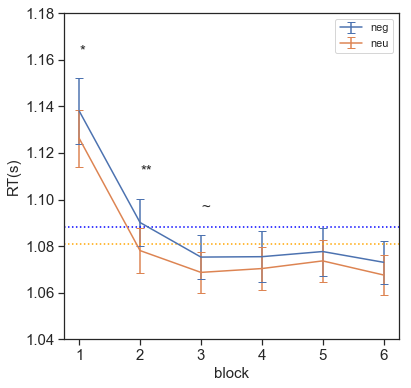

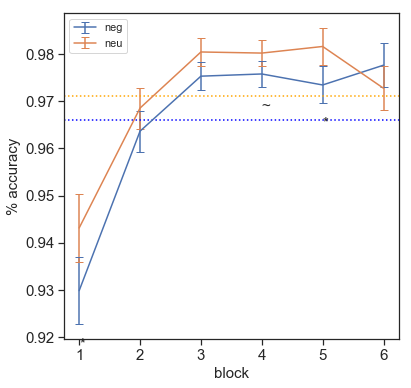

In [7]:
######################################################
#RT
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
subj_median=df_correct.groupby(['condition','block','subject'])['RT'].median().to_frame()
subj_median.reset_index(inplace=True)
neg_block_mean = subj_median[subj_median['condition'] == 'Aff'].groupby(['block','condition'])['RT'].mean().tolist()
neu_block_mean = subj_median[subj_median['condition'] == 'Neu'].groupby(['block','condition'])['RT'].mean().tolist()

neg_block_std = subj_median[subj_median['condition'] == 'Aff'].groupby(['block','condition'])['RT'].std().tolist()
neg_block_stderr = [x/sqrt(len(subj)) for x in neg_block_std]
neu_block_std = subj_median[subj_median['condition'] == 'Neu'].groupby(['block','condition'])['RT'].std().tolist()
neu_block_stderr = [x/sqrt(len(subj)) for x in neu_block_std]

# subj_median=df_correct.groupby(['block','subject'])['RT'].median().to_frame()
# subj_median.reset_index(inplace=True)
# all_block_mean = subj_median.groupby(['block'])['RT'].mean().tolist()
# all_block_std = subj_median.groupby(['block'])['RT'].std().tolist()
# all_block_stderr = [x/sqrt(len(subj)) for x in all_block_std]

plt.figure(figsize=(6,6))
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neg_block_mean,yerr=neg_block_stderr,capsize=4)
# eb[-1][0].set_linestyle(':')
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neu_block_mean,yerr=neu_block_stderr,capsize=4)
# eb[-1][0].set_linestyle(':')
# eb=plt.errorbar(x=list(range(param['num_blocks'])),y=all_block_mean,yerr=all_block_stderr,capsize=4,linestyle=':')
# eb[-1][0].set_linestyle(':')plt.legend(['neg','neu'])
plt.legend(['neg','neu'])
plt.axhline(y=mean(neg_block_mean),color='blue',linestyle=':')
plt.axhline(y=mean(neu_block_mean),color='orange',linestyle=':')
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylim(RT_range)

print('sig test')
print('RT')
for b in range(param['num_blocks']):
#     t1, p1 = stats.ttest_ind(df_correct[(df_correct['block']==b) & (df_correct['condition']=='Aff')]['RT'].tolist(),df_correct[(df_correct['block']==b) & (df_correct['condition']=='Neu')]['RT'].tolist())
    t1, p1 = stats.ttest_rel(subj_median[(subj_median['condition'] == 'Aff') & (subj_median['block'] == b)]['RT'].tolist(),
                             subj_median[(subj_median['condition'] == 'Neu') & (subj_median['block'] == b)]['RT'].tolist())
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'*',fontsize=15)
    elif p1 <= 0.1 and p1 > 0.05:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'~',fontsize=15)
        
twoWayRepeatedANOVA(subj_median,['condition','block','subject'],'negneu_medianRT.csv')
display(subj_median.rm_anova(dv='RT', within=['condition','block'],subject='subject',  detailed=False))    

######################################################
#ACC
subj_response=df_all.groupby(['condition','block','subject'])['response'].value_counts().to_frame()
subj_response.rename(columns={'response':'count'},inplace=True)
subj_response.reset_index(inplace=True)

subj_correct_response_neg=[[None]]*param['num_blocks']
neg_block_subj_acc=[[None]]*param['num_blocks']
neg_block_acc=[[None]]*param['num_blocks']
neg_block_stderr=[[None]]*param['num_blocks']
subj_correct_response_neu=[[None]]*param['num_blocks']
neu_block_subj_acc=[[None]]*param['num_blocks']
neu_block_acc=[[None]]*param['num_blocks']
neu_block_stderr=[[None]]*param['num_blocks']

plt.figure(figsize=(6,6))
for b in range(param['num_blocks']):
    
    subj_correct_response_neg[b] = subj_response[(subj_response['block']==b) & (subj_response['condition']=='Aff') & (subj_response['response']==1)]['count'].tolist()
    subj_correct_response_neu[b] = subj_response[(subj_response['block']==b) & (subj_response['condition']=='Neu') & (subj_response['response']==1)]['count'].tolist()

    all_trials=df_all.groupby(['condition','block','subject'])['response'].count().to_frame()
    all_trials.rename(columns={'response':'count'},inplace=True)
    all_trials.reset_index(inplace=True)
    subj_all_trial_response = all_trials['count'].unique()[0].tolist()

    neu_block_subj_acc[b] = [(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]]
    neu_block_acc[b] = mean(neu_block_subj_acc[b])
    neu_block_stderr[b] = np.std([(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]])/sqrt(len(subj))
    neg_block_subj_acc[b] = [(sd/subj_all_trial_response) for sd in subj_correct_response_neg[b]]
    neg_block_acc[b] = mean(neg_block_subj_acc[b])
    neg_block_stderr[b] = np.std([(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]])/sqrt(len(subj))

eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neg_block_acc,yerr=neg_block_stderr,capsize=4)
# eb[-1][0].set_linestyle(':')
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neu_block_acc,yerr=neu_block_stderr,capsize=4)
# eb[-1][0].set_linestyle(':')
plt.legend(['neg','neu'])
plt.axhline(y=mean(neg_block_acc),color='blue',linestyle=':')
plt.axhline(y=mean(neu_block_acc),color='orange',linestyle=':')
plt.ylabel('% accuracy', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)

print('sig test')
print('ACC')
for b in range(param['num_blocks']):
    t1, p1 = stats.ttest_rel(neu_block_subj_acc[b],neg_block_subj_acc[b])

    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]-neg_block_stderr[b]-0.005,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]-neg_block_stderr[b]-0.005,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]-neg_block_stderr[b]-0.005,'*',fontsize=15)
    elif p1 <= 0.1 and p1 > 0.05:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]-neg_block_stderr[b]-0.005,'~',fontsize=15)
        
twoWayRepeatedANOVA_list([neu_block_subj_acc,neg_block_subj_acc],['negneu','block','subj_id'],'negneu_meanACC.csv')


## structured vs unstructured

In [8]:
# structrue*position*block 3 way
subj_median_str_posi_block=df_correct.groupby(['structure','position','block','subject'])['RT'].median().to_frame()
subj_median_str_posi_block.reset_index(inplace=True)

# #aggregated first and last two blocks
# subj_median_str_posi_block=df_correct[(df_correct['block']==0) | (df_correct['block']==1) | (df_correct['block']==4) | (df_correct['block']==5)]
# subj_median_str_posi_block['block'][subj_median_str_posi_block['block'] == 1] = 0
# subj_median_str_posi_block['block'][subj_median_str_posi_block['block'] == 4] = 5

threeWayRepeatedANOVA(subj_median_str_posi_block,['structure','position','block','subject'],'structure+position+block_medianRT.csv')

# # structrue*pairtype*position*block 4 way
# # structrue vs unstructure
# subj_median_str_pt_posi_block=df_correct.groupby(['structure','pair_type','position','block','subject'])['RT'].median().to_frame()
# subj_median_str_pt_posi_block.reset_index(inplace=True)

# # #aggregated first and last two blocks
# # subj_median_str_pt_posi_block=df_correct[(df_correct['block']==0) | (df_correct['block']==1) | (df_correct['block']==4) | (df_correct['block']==5)]
# # subj_median_str_pt_posi_block['block'][subj_median_str_pt_posi_block['block'] == 1] = 0
# # subj_median_str_pt_posi_block['block'][subj_median_str_pt_posi_block['block'] == 4] = 5

# fourWayRepeatedANOVA(subj_median_str_pt_posi_block,['structure','pair_type','position','block','subject'],'structure+pairType+position+block_medianRT.csv')



                         Anova
                         Num DF  Den DF  F Value Pr > F
-------------------------------------------------------
structure                1.0000  52.0000  5.6112 0.0216
position                 1.0000  52.0000  4.0092 0.0505
block                    5.0000 260.0000 28.4157 0.0000
structure:position       1.0000  52.0000  0.1582 0.6925
structure:block          5.0000 260.0000  0.5128 0.7665
position:block           5.0000 260.0000  1.5230 0.1829
structure:position:block 5.0000 260.0000  1.9266 0.0903



## 1st vs 2nd

In [9]:
# 3-way aggretaion: ['pair_type','position','block','subject'] 
# all the figures below, except neg vs neu, all use this aggregation from here

print('all pair types')
######################################################
print('all blocks')
subj_median_allpt_posi_block=df_correct.groupby(['pair_type','position','block','subject'])['RT'].median().to_frame()
subj_median_allpt_posi_block.reset_index(inplace=True)

# #aggregated first and last two blocks
# subj_median_allpt_posi_block=df_correct[(df_correct['block']==0) | (df_correct['block']==1) | (df_correct['block']==4) | (df_correct['block']==5)]
# subj_median_allpt_posi_block['block'][subj_median_allpt_posi_block['block'] == 1] = 0
# subj_median_allpt_posi_block['block'][subj_median_allpt_posi_block['block'] == 4] = 5

threeWayRepeatedANOVA(subj_median_allpt_posi_block,['pair_type','position','block','subject'],'position+Allpairtype_medianRT.csv')

print('unstructured pair types')
######################################################
print('all blocks')
subj_median_unstrpt_posi_block=df_correct[(df_correct['pair_type']=='rand_NeuNeu') | (df_correct['pair_type']=='rand_AffNeu') | (df_correct['pair_type']=='rand_AffAff')].groupby(['pair_type','position','block','subject'])['RT'].median().to_frame()
subj_median_unstrpt_posi_block.reset_index(inplace=True)

# #aggregated first and last two blocks
# subj_median_unstrpt_posi_block=df_correct[(df_correct['block']==0) | (df_correct['block']==1) | (df_correct['block']==4) | (df_correct['block']==5)]
# subj_median_unstrpt_posi_block['block'][subj_median_unstrpt_posi_block['block'] == 1] = 0
# subj_median_unstrpt_posi_block['block'][subj_median_unstrpt_posi_block['block'] == 4] = 5

threeWayRepeatedANOVA(subj_median_unstrpt_posi_block,['pair_type','position','block','subject'],'position+Unstructuredpairtype_medianRT.csv')

print('structured pair types')
######################################################
print('all blocks')
subj_median_strpt_posi_block=df_correct[(df_correct['pair_type']=='NeuNeu') | (df_correct['pair_type']=='NeuAff') | (df_correct['pair_type']=='AffNeu') | (df_correct['pair_type']=='AffAff')].groupby(['pair_type','position','block','subject'])['RT'].median().to_frame()
subj_median_strpt_posi_block.reset_index(inplace=True)

# #aggregated first and last two blocks
# subj_median_strpt_posi_block=df_correct[(df_correct['block']==0) | (df_correct['block']==1) | (df_correct['block']==4) | (df_correct['block']==5)]
# subj_median_strpt_posi_block['block'][subj_median_strpt_posi_block['block'] == 1] = 0
# subj_median_strpt_posi_block['block'][subj_median_strpt_posi_block['block'] == 4] = 5

# threeWayRepeatedANOVA(subj_median_strpt_posi_block,['pair_type','position','block','subject'],'position+Structuredpairtype_medianRT.csv')

# # without NN pair
# subj_median_strpt_posi_block=df_correct[(df_correct['pair_type']=='NeuAff') | (df_correct['pair_type']=='AffNeu') | (df_correct['pair_type']=='AffAff')].groupby(['pair_type','position','block','subject'])['RT'].median().to_frame()
# subj_median_strpt_posi_block.reset_index(inplace=True)

# threeWayRepeatedANOVA(subj_median_strpt_posi_block,['pair_type','position','block','subject'],'position+Structuredpairtype_medianRT_noNN.csv')



all pair types
all blocks
                          Anova
                          Num DF   Den DF  F Value Pr > F
---------------------------------------------------------
pair_type                 6.0000  312.0000  4.5253 0.0002
position                  1.0000   52.0000  2.1616 0.1475
block                     5.0000  260.0000 32.0333 0.0000
pair_type:position        6.0000  312.0000  0.7057 0.6452
pair_type:block          30.0000 1560.0000  1.2922 0.1341
position:block            5.0000  260.0000  1.3594 0.2400
pair_type:position:block 30.0000 1560.0000  0.6864 0.8988

unstructured pair types
all blocks
                         Anova
                          Num DF  Den DF  F Value Pr > F
--------------------------------------------------------
pair_type                 2.0000 104.0000  0.0787 0.9244
position                  1.0000  52.0000  0.5309 0.4695
block                     5.0000 260.0000 25.6228 0.0000
pair_type:position        2.0000 104.0000  0.6243 0.5377
pair_type:b

### all pairs

sig test
RT
0.8481320198259104
0.8319091237558982
0.45917498277799806
0.48327090537231254
0.02817564602558122
sig at B 4  p = 0.02817564602558122
0.14360183825278003
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  2.1616 0.1475
block          5.0000 260.0000 32.0333 0.0000
position:block 5.0000 260.0000  1.3594 0.2400

sig test
ACC
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  0.2306 0.6331
block          5.0000 260.0000 21.3266 0.0000
position:block 5.0000 260.0000  1.1561 0.3313

sig test
RT by block
sig at B 4  p = 0.02817564602558122
               Anova
      Num DF  Den DF  F Value Pr > F
------------------------------------
block 5.0000 260.0000  1.3594 0.2400



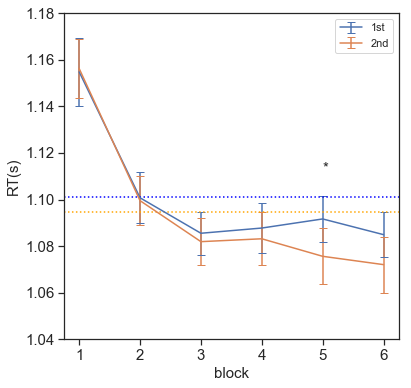

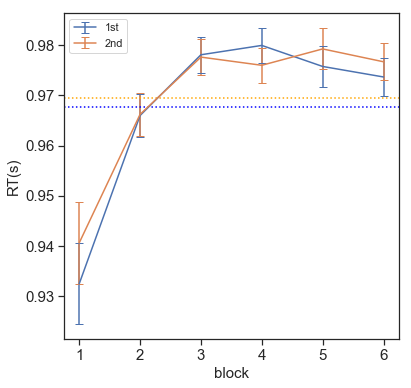

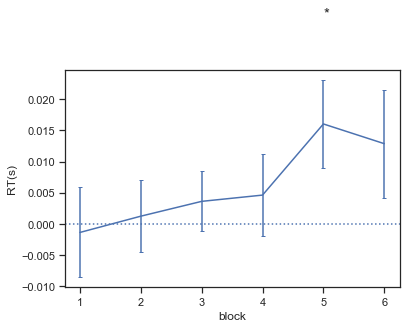

In [10]:
#all Pairs
#####################################################
#RT
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
subj_median= subj_median_allpt_posi_block.groupby(['position','block','subject'])['RT'].mean().to_frame()
subj_median.reset_index(inplace=True)

neg_block_mean = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].mean().tolist()
neu_block_mean = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].mean().tolist()

neg_block_std = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].std().tolist()
neg_block_stderr = [x/sqrt(len(subj)) for x in neg_block_std]
neu_block_std = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].std().tolist()
neu_block_stderr = [x/sqrt(len(subj)) for x in neu_block_std]

plt.figure(figsize=(6,6))
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neg_block_mean,yerr=neg_block_stderr,capsize=4)
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neu_block_mean,yerr=neu_block_stderr,capsize=4)
plt.legend(['1st','2nd'])
plt.axhline(y=mean(neg_block_mean),color='blue',linestyle=':')
plt.axhline(y=mean(neu_block_mean),color='orange',linestyle=':')
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylim(RT_range)

print('sig test')
print('RT')
for b in range(param['num_blocks']):
#     t1, p1 = stats.ttest_ind(df_correct[(df_correct['block']==b) & (df_correct['position']=='Aff')]['RT'].tolist(),df_correct[(df_correct['block']==b) & (df_correct['condition']=='Neu')]['RT'].tolist())
    t1, p1 = stats.ttest_rel(subj_median[(subj_median['position'] == 1) & (subj_median['block'] == b)]['RT'].tolist(),
                             subj_median[(subj_median['position'] == 2) & (subj_median['block'] == b)]['RT'].tolist())
    print(p1)
    if p1 <= 0.001:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'*',fontsize=15)
    elif p1 <= 0.1 and p1 > 0.05:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'~',fontsize=15)

twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_medianRT.csv')
# display(subj_median.rm_anova(dv='RT', within=['position','block'],subject='subject',  detailed=False))    

######################################################
#ACC
subj_response=df_all.groupby(['position','block','subject'])['response'].value_counts().to_frame()
subj_response.rename(columns={'response':'count'},inplace=True)
subj_response.reset_index(inplace=True)

subj_correct_response_neg=[[None]]*param['num_blocks']
neg_block_subj_acc=[[None]]*param['num_blocks']
neg_block_acc=[[None]]*param['num_blocks']
neg_block_stderr=[[None]]*param['num_blocks']
subj_correct_response_neu=[[None]]*param['num_blocks']
neu_block_subj_acc=[[None]]*param['num_blocks']
neu_block_acc=[[None]]*param['num_blocks']
neu_block_stderr=[[None]]*param['num_blocks']

plt.figure(figsize=(6,6))
for b in range(param['num_blocks']):
    
    subj_correct_response_neg[b] = subj_response[(subj_response['block']==b) & (subj_response['position']==1) & (subj_response['response']==1)]['count'].tolist()
    subj_correct_response_neu[b] = subj_response[(subj_response['block']==b) & (subj_response['position']==2) & (subj_response['response']==1)]['count'].tolist()

    all_trials=df_all.groupby(['position','block','subject'])['response'].count().to_frame()
    all_trials.rename(columns={'response':'count'},inplace=True)
    all_trials.reset_index(inplace=True)
    subj_all_trial_response = all_trials['count'].unique()[0].tolist()

    neu_block_subj_acc[b] = [(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]]
    neu_block_acc[b] = mean(neu_block_subj_acc[b])
    neu_block_stderr[b] = np.std([(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]])/sqrt(len(subj))
    neg_block_subj_acc[b] = [(sd/subj_all_trial_response) for sd in subj_correct_response_neg[b]]
    neg_block_acc[b] = mean(neg_block_subj_acc[b])
    neg_block_stderr[b] = np.std([(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]])/sqrt(len(subj))

eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neg_block_acc,yerr=neg_block_stderr,capsize=4)
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neu_block_acc,yerr=neu_block_stderr,capsize=4)
plt.legend(['1st','2nd'])
plt.axhline(y=mean(neg_block_acc),color='blue',linestyle=':')
plt.axhline(y=mean(neu_block_acc),color='orange',linestyle=':')
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)

print('sig test')
print('ACC')
for b in range(param['num_blocks']):
    t1, p1 = stats.ttest_rel(neu_block_subj_acc[b],neg_block_subj_acc[b])
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'*',fontsize=15)
    elif p1 <= 0.1:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'~',fontsize=15)

twoWayRepeatedANOVA_list([neu_block_subj_acc,neg_block_subj_acc],['position','block','subj_id'],'position_meanACC.csv')

#all Pairs
#####################################################
subj_median= subj_median_allpt_posi_block.groupby(['position','block','subject'])['RT'].mean().to_frame()
subj_median.reset_index(inplace=True)

posit_1_subj_mean=np.array(subj_median[subj_median['position']==1]['RT'].tolist())
posit_2_subj_mean=np.array(subj_median[subj_median['position']==2]['RT'].tolist())

posit_diff_subj = subj_median[subj_median['position']==1]
posit_diff_subj.drop('position', axis = 1, inplace = True)
posit_diff_subj['RT']=(posit_1_subj_mean-posit_2_subj_mean).tolist()

posit_diff_block = posit_diff_subj.groupby('block')['RT'].mean().to_frame()['RT'].tolist()
posit_diff_stderr_block = [sd/sqrt(len(subj)) for sd in posit_diff_subj.groupby('block')['RT'].std().to_frame()['RT'].tolist()]

plt.figure()
plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=posit_diff_block,yerr=posit_diff_stderr_block,capsize=2)
plt.ylabel('RT(s)')
plt.xlabel('block')
# plt.title('mean RT difference (1st-2nd) by repetition')
plt.axhline(y=[0],linestyle=':')

print('sig test')
print('RT by block')
for b in range(param['num_blocks']):
    t1, p1 = stats.ttest_rel(posit_diff_subj[posit_diff_subj['block']==b]['RT'],[0]*len(posit_diff_subj[posit_diff_subj['block']==b]['RT']))
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.01,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.01,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.01,'*',fontsize=15)
    elif p1 <= 0.1:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.01,'~',fontsize=15)

oneWayRepeatedANOVA(posit_diff_subj,['block','subject'],'position_diff_RT.csv')
# display(subj_median.rm_anova(dv='RT', within='block',subject='subject',  detailed=False))    



### structured pairs only

sig test
RT
sig at B 2  p = 0.04407302485740671
(almost) sig at B 3  p = 0.1
sig at B 4  p = 0.012203792765435394
sig at B 5  p = 0.017472367804811335
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  3.1964 0.0796
block          5.0000 260.0000 25.7121 0.0000
position:block 5.0000 260.0000  5.7766 0.0000

aggregated first and last two blocks
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  3.9486 0.0522
block          3.0000 156.0000 20.3784 0.0000
position:block 3.0000 156.0000  3.1767 0.0258

sig test
ACC
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  0.4173 0.5211
block          5.0000 260.0000 20.9539 0.0000
position:block 5.0000 260.0000  1.6049 0.1591

sig test
RT by block
sig at 

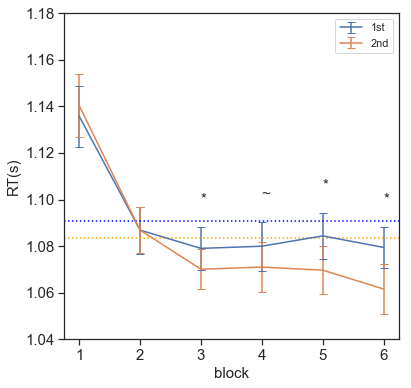

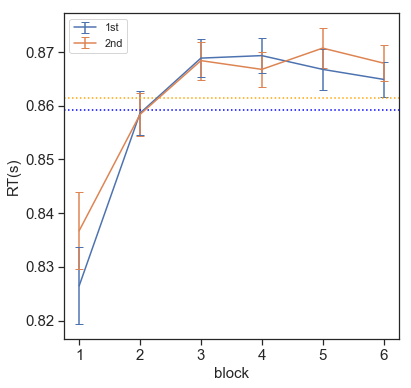

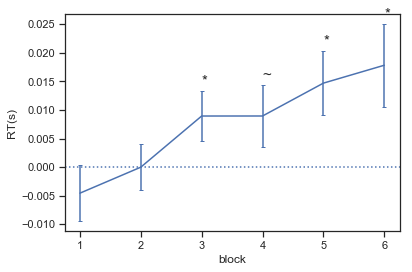

In [11]:
#structured Pairs
#####################################################
#RT
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
subj_median= subj_median_strpt_posi_block.groupby(['position','block','subject'])['RT'].mean().to_frame()
subj_median.reset_index(inplace=True)

neg_block_mean = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].mean().tolist()
neu_block_mean = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].mean().tolist()

neg_block_std = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].std().tolist()
neg_block_stderr = [x/sqrt(len(subj)) for x in neg_block_std]
neu_block_std = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].std().tolist()
neu_block_stderr = [x/sqrt(len(subj)) for x in neu_block_std]

plt.figure(figsize=(6,6))
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neg_block_mean,yerr=neg_block_stderr,capsize=4)
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neu_block_mean,yerr=neu_block_stderr,capsize=4)
plt.legend(['1st','2nd'])
plt.axhline(y=mean(neg_block_mean),color='blue',linestyle=':')
plt.axhline(y=mean(neu_block_mean),color='orange',linestyle=':')
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylim(RT_range)

print('sig test')
print('RT')
for b in range(param['num_blocks']):
#     t1, p1 = stats.ttest_ind(df_correct[(df_correct['block']==b) & (df_correct['position']=='Aff')]['RT'].tolist(),df_correct[(df_correct['block']==b) & (df_correct['condition']=='Neu')]['RT'].tolist())
    t1, p1 = stats.ttest_rel(subj_median[(subj_median['position'] == 1) & (subj_median['block'] == b)]['RT'].tolist(),
                             subj_median[(subj_median['position'] == 2) & (subj_median['block'] == b)]['RT'].tolist())
    if b ==3: p1=round(p1,2)
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'*',fontsize=15)
    elif p1 <= 0.1 and p1 > 0.05:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'~',fontsize=15)
        
twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_structured_medianRT.csv')

print('aggregated first and last two blocks')
subj_median=df_correct[(df_correct['pair_type']=='NeuNeu') | (df_correct['pair_type']=='NeuAff') | (df_correct['pair_type']=='AffNeu') | (df_correct['pair_type']=='AffAff') | (df_correct['block']==0) | (df_correct['block']==1) | (df_correct['block']==4) | (df_correct['block']==5)]
subj_median['block'][subj_median['block'] == 1] = 0
subj_median['block'][subj_median['block'] == 4] = 5
subj_median=subj_median.groupby(['position','block','subject'])['RT'].median().to_frame()
subj_median.reset_index(inplace=True)

twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_structured_medianRT_4b.csv')

######################################################
#ACC
subj_response=df_all[(df_all['pair_type']=='NeuNeu') | (df_all['pair_type']=='NeuAff') | (df_all['pair_type']=='AffNeu') | (df_all['pair_type']=='AffAff')].groupby(['position','block','subject'])['response'].value_counts().to_frame()
subj_response.rename(columns={'response':'count'},inplace=True)
subj_response.reset_index(inplace=True)

subj_correct_response_neg=[[None]]*param['num_blocks']
neg_block_subj_acc=[[None]]*param['num_blocks']
neg_block_acc=[[None]]*param['num_blocks']
neg_block_stderr=[[None]]*param['num_blocks']
subj_correct_response_neu=[[None]]*param['num_blocks']
neu_block_subj_acc=[[None]]*param['num_blocks']
neu_block_acc=[[None]]*param['num_blocks']
neu_block_stderr=[[None]]*param['num_blocks']

plt.figure(figsize=(6,6))
for b in range(param['num_blocks']):
    
    subj_correct_response_neg[b] = subj_response[(subj_response['block']==b) & (subj_response['position']==1) & (subj_response['response']==1)]['count'].tolist()
    subj_correct_response_neu[b] = subj_response[(subj_response['block']==b) & (subj_response['position']==2) & (subj_response['response']==1)]['count'].tolist()

    all_trials=df_all.groupby(['position','block','subject'])['response'].count().to_frame()
    all_trials.rename(columns={'response':'count'},inplace=True)
    all_trials.reset_index(inplace=True)
    subj_all_trial_response = all_trials['count'].unique()[0].tolist()

    neu_block_subj_acc[b] = [(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]]
    neu_block_acc[b] = mean(neu_block_subj_acc[b])
    neu_block_stderr[b] = np.std([(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]])/sqrt(len(subj))
    neg_block_subj_acc[b] = [(sd/subj_all_trial_response) for sd in subj_correct_response_neg[b]]
    neg_block_acc[b] = mean(neg_block_subj_acc[b])
    neg_block_stderr[b] = np.std([(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]])/sqrt(len(subj))

eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neg_block_acc,yerr=neg_block_stderr,capsize=4)
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neu_block_acc,yerr=neu_block_stderr,capsize=4)
plt.legend(['1st','2nd'])
plt.axhline(y=mean(neg_block_acc),color='blue',linestyle=':')
plt.axhline(y=mean(neu_block_acc),color='orange',linestyle=':')
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)

print('sig test')
print('ACC')
for b in range(param['num_blocks']):
    t1, p1 = stats.ttest_rel(neu_block_subj_acc[b],neg_block_subj_acc[b])
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'*',fontsize=15)
    elif p1 <= 0.1:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'~',fontsize=15)
        
twoWayRepeatedANOVA_list([neu_block_subj_acc,neg_block_subj_acc],['position','block','subj_id'],'position_structured_meanACC.csv')

#structured Pairs
#####################################################
subj_median= subj_median_strpt_posi_block.groupby(['position','block','subject'])['RT'].mean().to_frame()
subj_median.reset_index(inplace=True)

posit_1_subj_mean=np.array(subj_median[subj_median['position']==1]['RT'].tolist())
posit_2_subj_mean=np.array(subj_median[subj_median['position']==2]['RT'].tolist())

posit_diff_subj = subj_median[subj_median['position']==1]
posit_diff_subj.drop('position', axis = 1, inplace = True)
posit_diff_subj['RT']=(posit_1_subj_mean-posit_2_subj_mean).tolist()

posit_diff_block = posit_diff_subj.groupby('block')['RT'].mean().to_frame()['RT'].tolist()
posit_diff_stderr_block = [sd/sqrt(len(subj)) for sd in posit_diff_subj.groupby('block')['RT'].std().to_frame()['RT'].tolist()]

plt.figure()
plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=posit_diff_block,yerr=posit_diff_stderr_block,capsize=2)
plt.ylabel('RT(s)')
plt.xlabel('block')
# plt.title('mean RT difference (1st-2nd) by repetition')
plt.axhline(y=[0],linestyle=':')

print('sig test')
print('RT by block')
for b in range(param['num_blocks']):
    t1, p1 = stats.ttest_rel(posit_diff_subj[posit_diff_subj['block']==b]['RT'],[0]*len(posit_diff_subj[posit_diff_subj['block']==b]['RT']))
    if b ==3: p1=round(p1,2)
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'*',fontsize=15)
    elif p1 <= 0.1:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'~',fontsize=15)

oneWayRepeatedANOVA(posit_diff_subj,['block','subject'],'position_structured_diff_RT.csv')




### unstructured pairs only

sig test
RT
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  0.5309 0.4695
block          5.0000 260.0000 25.6228 0.0000
position:block 5.0000 260.0000  0.3950 0.8521

aggregated first and last two blocks
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  1.2535 0.2680
block          3.0000 156.0000 15.8655 0.0000
position:block 3.0000 156.0000  1.4755 0.2234

sig test
ACC
(almost) sig at B 3  p = 0.05112187562442974
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  0.1302 0.7197
block          5.0000 260.0000 15.4908 0.0000
position:block 5.0000 260.0000  1.7108 0.1324

sig test
RT by block
               Anova
      Num DF  Den DF  F Value Pr > F
------------------------------------
block 

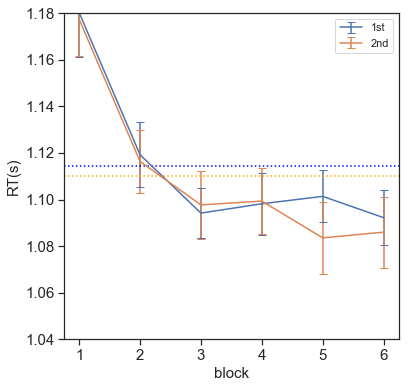

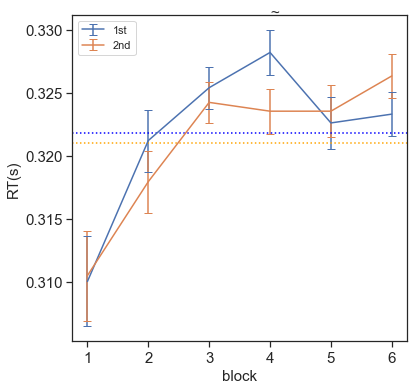

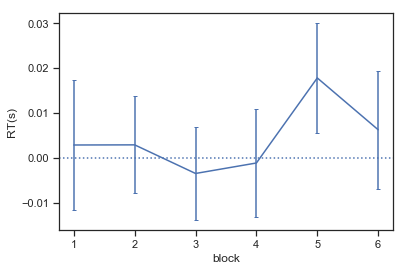

In [12]:
#unstructured Pairs
#####################################################
#RT
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
subj_median= subj_median_unstrpt_posi_block.groupby(['position','block','subject'])['RT'].mean().to_frame()
subj_median.reset_index(inplace=True)

neg_block_mean = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].mean().tolist()
neu_block_mean = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].mean().tolist()

neg_block_std = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].std().tolist()
neg_block_stderr = [x/sqrt(len(subj)) for x in neg_block_std]
neu_block_std = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].std().tolist()
neu_block_stderr = [x/sqrt(len(subj)) for x in neu_block_std]

plt.figure(figsize=(6,6))
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neg_block_mean,yerr=neg_block_stderr,capsize=4)
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neu_block_mean,yerr=neu_block_stderr,capsize=4)
plt.legend(['1st','2nd'])
plt.axhline(y=mean(neg_block_mean),color='blue',linestyle=':')
plt.axhline(y=mean(neu_block_mean),color='orange',linestyle=':')
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylim(RT_range)

print('sig test')
print('RT')
for b in range(param['num_blocks']):
#     t1, p1 = stats.ttest_ind(df_correct[(df_correct['block']==b) & (df_correct['position']=='Aff')]['RT'].tolist(),df_correct[(df_correct['block']==b) & (df_correct['condition']=='Neu')]['RT'].tolist())
    t1, p1 = stats.ttest_rel(subj_median[(subj_median['position'] == 1) & (subj_median['block'] == b)]['RT'].tolist(),
                             subj_median[(subj_median['position'] == 2) & (subj_median['block'] == b)]['RT'].tolist()) 
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'*',fontsize=15)
    elif p1 <= 0.1:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_mean[b]+neg_block_stderr[b]+0.01,'~',fontsize=15) 
        
twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_unstructured_medianRT.csv')

print('aggregated first and last two blocks')
subj_median=df_correct[(df_correct['pair_type']=='rand_AffAff') | (df_correct['pair_type']=='rand_AffNeu') | (df_correct['pair_type']=='rand_NeuNeu')].groupby(['position','block','subject'])['RT'].median().to_frame()
subj_median.reset_index(inplace=True)
subj_median['block'][subj_median['block'] == 1] = 0
subj_median['block'][subj_median['block'] == 4] = 5
subj_median=subj_median.groupby(['position','block','subject'])['RT'].median().to_frame()
subj_median.reset_index(inplace=True)

twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_unstructured_medianRT_4b.csv')

######################################################
#ACC
subj_response=df_all[(df_all['pair_type']=='rand_AffAff') | (df_all['pair_type']=='rand_AffNeu') | (df_all['pair_type']=='rand_NeuNeu') | (df_all['pair_type']=='AffAff')].groupby(['position','block','subject'])['response'].value_counts().to_frame()
subj_response.rename(columns={'response':'count'},inplace=True)
subj_response.reset_index(inplace=True)

subj_correct_response_neg=[[None]]*param['num_blocks']
neg_block_subj_acc=[[None]]*param['num_blocks']
neg_block_acc=[[None]]*param['num_blocks']
neg_block_stderr=[[None]]*param['num_blocks']
subj_correct_response_neu=[[None]]*param['num_blocks']
neu_block_subj_acc=[[None]]*param['num_blocks']
neu_block_acc=[[None]]*param['num_blocks']
neu_block_stderr=[[None]]*param['num_blocks']

plt.figure(figsize=(6,6))
for b in range(param['num_blocks']):
    
    subj_correct_response_neg[b] = subj_response[(subj_response['block']==b) & (subj_response['position']==1) & (subj_response['response']==1)]['count'].tolist()
    subj_correct_response_neu[b] = subj_response[(subj_response['block']==b) & (subj_response['position']==2) & (subj_response['response']==1)]['count'].tolist()

    all_trials=df_all.groupby(['position','block','subject'])['response'].count().to_frame()
    all_trials.rename(columns={'response':'count'},inplace=True)
    all_trials.reset_index(inplace=True)
    subj_all_trial_response = all_trials['count'].unique()[0].tolist()

    neu_block_subj_acc[b] = [(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]]
    neu_block_acc[b] = mean(neu_block_subj_acc[b])
    neu_block_stderr[b] = np.std([(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]])/sqrt(len(subj))
    neg_block_subj_acc[b] = [(sd/subj_all_trial_response) for sd in subj_correct_response_neg[b]]
    neg_block_acc[b] = mean(neg_block_subj_acc[b])
    neg_block_stderr[b] = np.std([(sd/subj_all_trial_response) for sd in subj_correct_response_neu[b]])/sqrt(len(subj))

eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neg_block_acc,yerr=neg_block_stderr,capsize=4)
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=neu_block_acc,yerr=neu_block_stderr,capsize=4)
plt.legend(['1st','2nd'])
plt.axhline(y=mean(neg_block_acc),color='blue',linestyle=':')
plt.axhline(y=mean(neu_block_acc),color='orange',linestyle=':')
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)

print('sig test')
print('ACC')
for b in range(param['num_blocks']):
    t1, p1 = stats.ttest_rel(neu_block_subj_acc[b],neg_block_subj_acc[b])
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'*',fontsize=15)
    elif p1 <= 0.1:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, neg_block_acc[b]+neg_block_stderr[b]+0.001,'~',fontsize=15) 

twoWayRepeatedANOVA_list([neu_block_subj_acc,neg_block_subj_acc],['position','block','subj_id'],'position_unstructured_meanACC.csv')

#unstructured Pairs
#####################################################
subj_median= subj_median_unstrpt_posi_block.groupby(['position','block','subject'])['RT'].mean().to_frame()
subj_median.reset_index(inplace=True)

posit_1_subj_mean=np.array(subj_median[subj_median['position']==1]['RT'].tolist())
posit_2_subj_mean=np.array(subj_median[subj_median['position']==2]['RT'].tolist())

posit_diff_subj = subj_median[subj_median['position']==1]
posit_diff_subj.drop('position', axis = 1, inplace = True)
posit_diff_subj['RT']=(posit_1_subj_mean-posit_2_subj_mean).tolist()

posit_diff_block = posit_diff_subj.groupby('block')['RT'].mean().to_frame()['RT'].tolist()
posit_diff_stderr_block = [sd/sqrt(len(subj)) for sd in posit_diff_subj.groupby('block')['RT'].std().to_frame()['RT'].tolist()]

plt.figure()
plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=posit_diff_block,yerr=posit_diff_stderr_block,capsize=2)
plt.ylabel('RT(s)')
plt.xlabel('block')
# plt.title('mean RT difference (1st-2nd) by repetition')
plt.axhline(y=[0],linestyle=':')

print('sig test')
print('RT by block')
for b in range(param['num_blocks']):
    t1, p1 = stats.ttest_rel(posit_diff_subj[posit_diff_subj['block']==b]['RT'],[0]*len(posit_diff_subj[posit_diff_subj['block']==b]['RT']))
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.01,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.01,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.01,'*',fontsize=15)
    elif p1 <= 0.1:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.01,'~',fontsize=15) 

oneWayRepeatedANOVA(posit_diff_subj,['block','subject'],'position_unstructured_diff_RT.csv')




## 1st vs 2nd by pair type

### structured pairs only

AffNeu
sig test
RT
(almost) sig at B 1  p = 0.09879112701549489
sig at B 3  p = 0.010643477029402668
sig at B 5  p = 0.027415788052762926
all blocks
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  3.8991 0.0536
block          5.0000 260.0000 24.1942 0.0000
position:block 5.0000 260.0000  1.4217 0.2167



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.024,1,52,0.024,3.899,5.363388e-02,5.363388e-02,0.070,1.000
1,block,0.434,5,260,0.087,24.194,5.589879e-20,3.104552e-11,0.318,0.506
2,position * block,0.006,5,260,0.001,1.422,2.166937e-01,2.385322e-01,0.027,0.200


aggregated first and last two blocks
                   Anova
               Num DF  Den DF F Value Pr > F
--------------------------------------------
position       1.0000 52.0000  2.8619 0.0967
block          1.0000 52.0000 22.7741 0.0000
position:block 1.0000 52.0000  0.9016 0.3468



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.006,1,52,0.006,2.862,0.096686,0.096686,0.052,1.0
1,block,0.096,1,52,0.096,22.774,0.000015,0.000015,0.305,1.0
2,position * block,0.001,1,52,0.001,0.902,0.346751,0.346751,0.017,1.0


NeuAff
sig test
RT
sig at B 4  p = 0.03332732098071047
sig at B 5  p = 0.026060629702783795
all blocks
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  1.5859 0.2135
block          5.0000 260.0000 17.4443 0.0000
position:block 5.0000 260.0000  3.3973 0.0054



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.016,1,52,0.016,1.586,2.135355e-01,2.135355e-01,0.030,1.000
1,block,0.300,5,260,0.060,17.444,6.854238e-15,3.360384e-09,0.251,0.552
2,position * block,0.021,5,260,0.004,3.397,5.440294e-03,7.100788e-02,0.061,0.200


aggregated first and last two blocks
                   Anova
               Num DF  Den DF F Value Pr > F
--------------------------------------------
position       1.0000 52.0000  2.0059 0.1627
block          1.0000 52.0000 16.8667 0.0001
position:block 1.0000 52.0000  6.7638 0.0121



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.007,1,52,0.007,2.006,0.162652,0.162652,0.037,1.0
1,block,0.071,1,52,0.071,16.867,0.000142,0.000142,0.245,1.0
2,position * block,0.008,1,52,0.008,6.764,0.012084,0.012084,0.115,1.0


NeuNeu
sig test
RT
sig at B 0  p = 0.012461823119194153
sig at B 5  p = 0.04716496029631651
all blocks
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  0.0344 0.8536
block          5.0000 260.0000 16.0053 0.0000
position:block 5.0000 260.0000  6.0058 0.0000



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.000,1,52,0.000,0.034,8.535679e-01,8.535679e-01,0.001,1.000
1,block,0.262,5,260,0.052,16.005,9.484401e-14,1.868808e-07,0.235,0.457
2,position * block,0.030,5,260,0.006,6.006,2.802623e-05,1.765846e-02,0.104,0.200


aggregated first and last two blocks
                   Anova
               Num DF  Den DF F Value Pr > F
--------------------------------------------
position       1.0000 52.0000  0.2072 0.6508
block          1.0000 52.0000 12.4702 0.0009
position:block 1.0000 52.0000  9.7255 0.0030



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.000,1,52,0.000,0.207,0.650834,0.650834,0.004,1.0
1,block,0.058,1,52,0.058,12.470,0.000876,0.000876,0.193,1.0
2,position * block,0.010,1,52,0.010,9.726,0.002961,0.002961,0.158,1.0


AffAff
sig test
RT
(almost) sig at B 2  p = 0.0936104853391556
sig at B 4  p = 0.023314139441366816
all blocks
                    Anova
               Num DF  Den DF  F Value Pr > F
---------------------------------------------
position       1.0000  52.0000  1.6831 0.2002
block          5.0000 260.0000 21.2133 0.0000
position:block 5.0000 260.0000  2.3198 0.0438



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.014,1,52,0.014,1.683,2.002450e-01,2.002450e-01,0.031,1.00
1,block,0.415,5,260,0.083,21.213,8.757499e-18,2.475719e-10,0.290,0.52
2,position * block,0.011,5,260,0.002,2.320,4.378646e-02,1.337992e-01,0.043,0.20


aggregated first and last two blocks
                   Anova
               Num DF  Den DF F Value Pr > F
--------------------------------------------
position       1.0000 52.0000  1.2077 0.2769
block          1.0000 52.0000 25.2750 0.0000
position:block 1.0000 52.0000  6.5929 0.0132



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.004,1,52,0.004,1.208,0.276854,0.276854,0.023,1.0
1,block,0.095,1,52,0.095,25.275,0.000006,0.000006,0.327,1.0
2,position * block,0.003,1,52,0.003,6.593,0.013153,0.013153,0.113,1.0


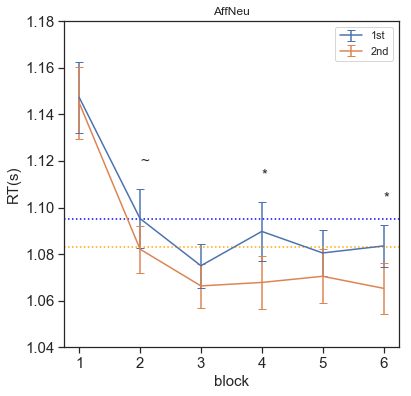

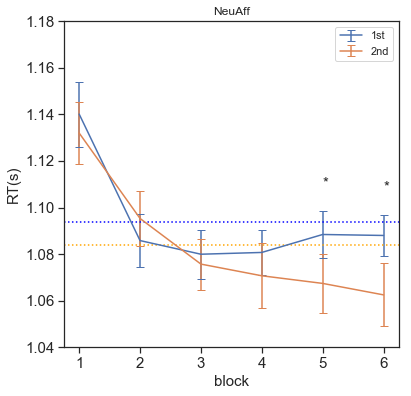

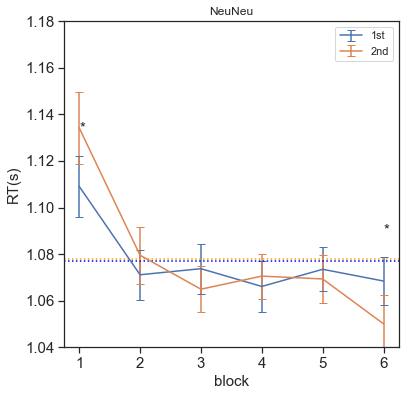

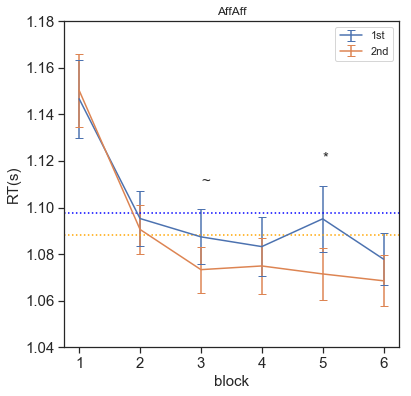

In [13]:
# triplet_types = ['BN','NB','NN','BB','NN_rand','BB_rand','BN_rand']
triplet_types = ['AffNeu', 'NeuAff', 'NeuNeu','AffAff']

first_block_mean_all=[]
second_block_mean_all=[]
first_block_stderr_all=[]
second_block_stderr_all=[]
for type_of_triplet in list(range(len(triplet_types))):

    print(triplet_types[type_of_triplet])
    
    subj_median= subj_median_strpt_posi_block.groupby(['position','block','subject'])['RT'].mean().to_frame()
    subj_median.reset_index(inplace=True)


    subj_median=df_correct[df_correct['pair_type']==triplet_types[type_of_triplet]].groupby(['position','block','subject'])['RT'].median().to_frame()
    subj_median.reset_index(inplace=True)
    first_block_mean = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].mean().tolist()
    second_block_mean = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].mean().tolist()

    first_block_mean_all.append(first_block_mean)
    second_block_mean_all.append(second_block_mean)
    
    first_block_std = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].std().tolist()
    first_block_stderr = [x/sqrt(len(subj)) for x in first_block_std]
    second_block_std = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].std().tolist()
    second_block_stderr = [x/sqrt(len(subj)) for x in second_block_std]
    
    first_block_stderr_all.append(first_block_stderr)
    second_block_stderr_all.append(second_block_stderr)

    plt.figure(figsize=(6,6))
    eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=first_block_mean,yerr=first_block_stderr,capsize=4)
    eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=second_block_mean,yerr=second_block_stderr,capsize=4)
    plt.legend(['1st','2nd'])
    plt.axhline(y=mean(first_block_mean),color='blue',linestyle=':')
    plt.axhline(y=mean(second_block_mean),color='orange',linestyle=':')
    plt.ylabel('RT(s)', fontsize=15)
    plt.xlabel('block', fontsize=15)
    plt.title(triplet_types[type_of_triplet])
    plt.tick_params(labelsize=15)
    plt.ylim(RT_range)

    print('sig test')
    print('RT')
    for b in range(param['num_blocks']):
    #     t1, p1 = stats.ttest_ind(df_correct[(df_correct['block']==b) & (df_correct['position']=='Aff')]['RT'].tolist(),df_correct[(df_correct['block']==b) & (df_correct['condition']=='Neu')]['RT'].tolist())
        t1, p1 = stats.ttest_rel(subj_median[(subj_median['position'] == 1) & (subj_median['block'] == b)]['RT'].tolist(),
                                 subj_median[(subj_median['position'] == 2) & (subj_median['block'] == b)]['RT'].tolist())
        if p1 <= 0.005:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, first_block_mean[b]+first_block_stderr[b]+0.01,'***',fontsize=15)
        elif p1 <= 0.01:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, first_block_mean[b]+first_block_stderr[b]+0.01,'**',fontsize=15)
        elif p1 <= 0.05:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, first_block_mean[b]+first_block_stderr[b]+0.01,'*',fontsize=15)
        elif p1 <= 0.1 and p1 > 0.05:
            print('(almost) sig at','B',b," p = " + str(p1))
            plt.text(b+1, first_block_mean[b]+first_block_stderr[b]+0.01,'~',fontsize=15)

    ######################################################
    print('all blocks')
    twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_medianRT_'+triplet_types[type_of_triplet]+'.csv')
    display(subj_median.rm_anova(dv='RT', within=['position','block'],subject='subject',  detailed=False))    
    
    ######################################################
    print('aggregated first and last two blocks')

    subj_median=subj_median[(subj_median['block']==0) | (subj_median['block']==1) | (subj_median['block']==4) | (subj_median['block']==5)]
    subj_median['block'][subj_median['block'] == 1] = 0
    subj_median['block'][subj_median['block'] == 4] = 5
    subj_median=subj_median.groupby(['position','block','subject'])['RT'].median().to_frame()
    subj_median.reset_index(inplace=True)

    twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_medianRT_4b_'+triplet_types[type_of_triplet]+'.csv')
    display(subj_median.rm_anova(dv='RT', within=['position','block'],subject='subject',  detailed=False))    

    
    

sig test
RT
sig at B 2  p = 0.021189117299314646
sig at B 4  p = 0.04920074211701872
sig at B 5  p = 0.012600698892136716


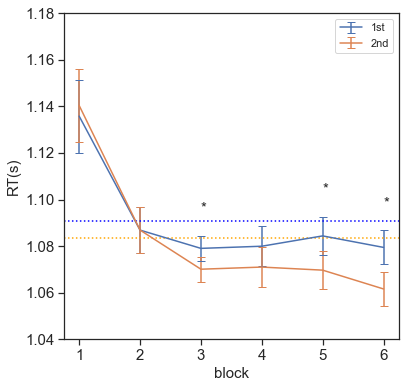

In [14]:
#aggregated mean from all the pair types
plt.figure(figsize=(6,6))
plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=np.mean(first_block_mean_all, 0).tolist(),yerr=np.std(first_block_mean_all, 0).tolist(),capsize=4)
plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=np.mean(second_block_mean_all, 0).tolist(),yerr=np.std(first_block_mean_all, 0).tolist(),capsize=4)
plt.legend(['1st','2nd'])
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylim(RT_range)
plt.axhline(y=mean(np.mean(first_block_mean_all, 0)),color='blue',linestyle=':')
plt.axhline(y=mean(np.mean(second_block_mean_all, 0)),color='orange',linestyle=':')

print('sig test')
print('RT')
for b in range(param['num_blocks']):
#     t1, p1 = stats.ttest_ind(df_correct[(df_correct['block']==b) & (df_correct['position']=='Aff')]['RT'].tolist(),df_correct[(df_correct['block']==b) & (df_correct['condition']=='Neu')]['RT'].tolist())
    t1, p1 = stats.ttest_rel(list(zip(*first_block_mean_all))[b],list(zip(*second_block_mean_all))[b])
    
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, np.mean(first_block_mean_all, 0).tolist()[b]+np.std(first_block_mean_all, 0).tolist()[b]+0.01,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, np.mean(first_block_mean_all, 0).tolist()[b]+np.std(first_block_mean_all, 0).tolist()[b]+0.01,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, np.mean(first_block_mean_all, 0).tolist()[b]+np.std(first_block_mean_all, 0).tolist()[b]+0.01,'*',fontsize=15)
    elif p1 <= 0.1:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, np.mean(first_block_mean_all, 0).tolist()[b]+np.std(first_block_mean_all, 0).tolist()[b]+0.01,'~',fontsize=15)


### unstructured pairs only

rand_AffNeu
sig test
RT
all blocks


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.002,1,52,0.002,0.152,6.983883e-01,6.983883e-01,0.003,1.00
1,block,0.810,5,260,0.162,12.773,4.121435e-11,1.340867e-07,0.197,0.61
2,position * block,0.018,5,260,0.004,0.352,8.805508e-01,5.554086e-01,0.007,0.20


aggregated first and last two blocks


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.000,1,52,0.000,0.052,0.821335,0.821335,0.001,1.0
1,block,0.179,1,52,0.179,18.158,0.000086,0.000086,0.259,1.0
2,position * block,0.000,1,52,0.000,0.018,0.892971,0.892971,0.000,1.0


rand_NeuNeu
sig test
RT
all blocks


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.014,1,52,0.014,0.988,3.247353e-01,3.247353e-01,0.019,1.000
1,block,0.511,5,260,0.102,10.424,3.954061e-09,2.168943e-07,0.167,0.754
2,position * block,0.016,5,260,0.003,0.317,9.027604e-01,5.760532e-01,0.006,0.200


aggregated first and last two blocks


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.002,1,52,0.002,0.258,0.613567,0.613567,0.005,1.0
1,block,0.146,1,52,0.146,17.315,0.000119,0.000119,0.250,1.0
2,position * block,0.002,1,52,0.002,0.373,0.544166,0.544166,0.007,1.0


rand_AffAff
sig test
RT
(almost) sig at B 4  p = 0.05967420485920678
all blocks


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.006,1,52,0.006,0.491,4.864333e-01,0.486433,0.009,1.000
1,block,0.612,5,260,0.122,10.714,2.235722e-09,0.000004,0.171,0.561
2,position * block,0.037,5,260,0.007,0.721,6.079241e-01,0.399593,0.014,0.200


aggregated first and last two blocks


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,position,0.010,1,52,0.010,1.501,0.225995,0.225995,0.028,1.0
1,block,0.204,1,52,0.204,15.279,0.000270,0.000270,0.227,1.0
2,position * block,0.002,1,52,0.002,0.256,0.614930,0.614930,0.005,1.0


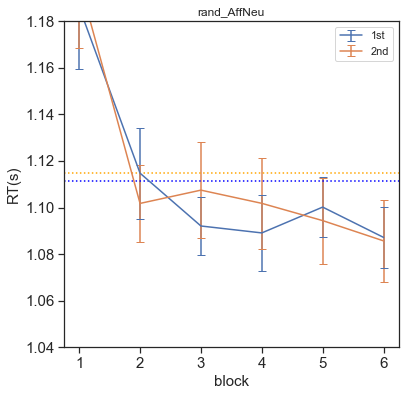

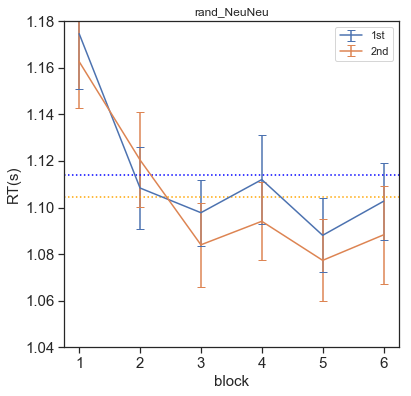

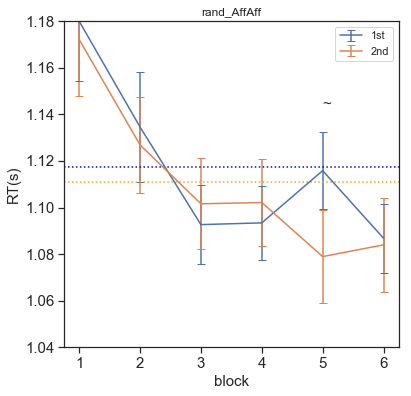

In [15]:
# triplet_types = ['BN','NB','NN','BB','NN_rand','BB_rand','BN_rand']
triplet_types = ['rand_AffNeu', 'rand_NeuNeu','rand_AffAff']

first_block_mean_all=[]
second_block_mean_all=[]
first_block_stderr_all=[]
second_block_stderr_all=[]
for type_of_triplet in list(range(len(triplet_types))):

    print(triplet_types[type_of_triplet])
    
    subj_median=df_correct[df_correct['pair_type']==triplet_types[type_of_triplet]].groupby(['position','block','subject'])['RT'].median().to_frame()
    subj_median.reset_index(inplace=True)
    first_block_mean = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].mean().tolist()
    second_block_mean = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].mean().tolist()

    first_block_mean_all.append(first_block_mean)
    second_block_mean_all.append(second_block_mean)
    
    first_block_std = subj_median[subj_median['position'] == 1].groupby(['block','position'])['RT'].std().tolist()
    first_block_stderr = [x/sqrt(len(subj)) for x in first_block_std]
    second_block_std = subj_median[subj_median['position'] == 2].groupby(['block','position'])['RT'].std().tolist()
    second_block_stderr = [x/sqrt(len(subj)) for x in second_block_std]
    
    first_block_stderr_all.append(first_block_stderr)
    second_block_stderr_all.append(second_block_stderr)

    plt.figure(figsize=(6,6))
    eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=first_block_mean,yerr=first_block_stderr,capsize=4)
    eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=second_block_mean,yerr=second_block_stderr,capsize=4)
    plt.legend(['1st','2nd'])
    plt.axhline(y=mean(first_block_mean),color='blue',linestyle=':')
    plt.axhline(y=mean(second_block_mean),color='orange',linestyle=':')
    plt.ylabel('RT(s)', fontsize=15)
    plt.xlabel('block', fontsize=15)
    plt.title(triplet_types[type_of_triplet])
    plt.tick_params(labelsize=15)
    plt.ylim(RT_range)

    print('sig test')
    print('RT')
    for b in range(param['num_blocks']):
    #     t1, p1 = stats.ttest_ind(df_correct[(df_correct['block']==b) & (df_correct['position']=='Aff')]['RT'].tolist(),df_correct[(df_correct['block']==b) & (df_correct['condition']=='Neu')]['RT'].tolist())
        t1, p1 = stats.ttest_rel(subj_median[(subj_median['position'] == 1) & (subj_median['block'] == b)]['RT'].tolist(),
                                 subj_median[(subj_median['position'] == 2) & (subj_median['block'] == b)]['RT'].tolist())
        if p1 <= 0.005:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, first_block_mean[b]+first_block_stderr[b]+0.01,'***',fontsize=15)
        elif p1 <= 0.01:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, first_block_mean[b]+first_block_stderr[b]+0.01,'**',fontsize=15)
        elif p1 <= 0.05:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, first_block_mean[b]+first_block_stderr[b]+0.01,'*',fontsize=15)
        elif p1 <= 0.1 and p1 > 0.05:
            print('(almost) sig at','B',b," p = " + str(p1))
            plt.text(b+1, first_block_mean[b]+first_block_stderr[b]+0.01,'~',fontsize=15)

    ######################################################
    print('all blocks')
#     twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_medianRT_'+triplet_types[type_of_triplet]+'.csv')
    display(subj_median.rm_anova(dv='RT', within=['position','block'],subject='subject',  detailed=False))    
    
    ######################################################
    print('aggregated first and last two blocks')

    subj_median=subj_median[(subj_median['block']==0) | (subj_median['block']==1) | (subj_median['block']==4) | (subj_median['block']==5)]
    subj_median['block'][subj_median['block'] == 1] = 0
    subj_median['block'][subj_median['block'] == 4] = 5
    subj_median=subj_median.groupby(['position','block','subject'])['RT'].median().to_frame()
    subj_median.reset_index(inplace=True)

#     twoWayRepeatedANOVA(subj_median,['position','block','subject'],'position_medianRT_4b_'+triplet_types[type_of_triplet]+'.csv')
    display(subj_median.rm_anova(dv='RT', within=['position','block'],subject='subject',  detailed=False))    


sig test
RT


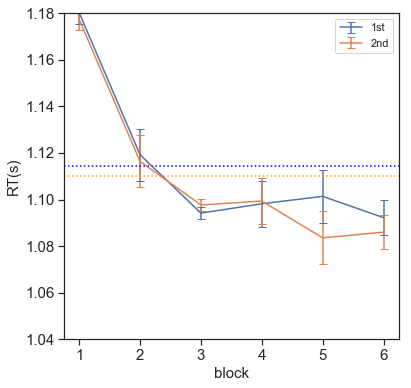

In [16]:
#aggregated mean from all the pair types
plt.figure(figsize=(6,6))
plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=np.mean(first_block_mean_all, 0).tolist(),yerr=np.std(first_block_mean_all, 0).tolist(),capsize=4)
plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=np.mean(second_block_mean_all, 0).tolist(),yerr=np.std(first_block_mean_all, 0).tolist(),capsize=4)
plt.legend(['1st','2nd'])
plt.ylabel('RT(s)', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylim(RT_range)
plt.axhline(y=mean(np.mean(first_block_mean_all, 0)),color='blue',linestyle=':')
plt.axhline(y=mean(np.mean(second_block_mean_all, 0)),color='orange',linestyle=':')

print('sig test')
print('RT')
for b in range(param['num_blocks']):
#     t1, p1 = stats.ttest_ind(df_correct[(df_correct['block']==b) & (df_correct['position']=='Aff')]['RT'].tolist(),df_correct[(df_correct['block']==b) & (df_correct['condition']=='Neu')]['RT'].tolist())
    t1, p1 = stats.ttest_rel(list(zip(*first_block_mean_all))[b],list(zip(*second_block_mean_all))[b])
    if p1 <= 0.005:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, np.mean(first_block_mean_all, 0).tolist()[b]+np.std(first_block_mean_all, 0).tolist()[b]+0.01,'***',fontsize=15)
    elif p1 <= 0.01:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, np.mean(first_block_mean_all, 0).tolist()[b]+np.std(first_block_mean_all, 0).tolist()[b]+0.01,'**',fontsize=15)
    elif p1 <= 0.05:
        print('sig at','B',b," p = " + str(p1))
        plt.text(b+1, np.mean(first_block_mean_all, 0).tolist()[b]+np.std(first_block_mean_all, 0).tolist()[b]+0.01,'*',fontsize=15)
    elif p1 <= 0.1 and p1 > 0.05:
        print('(almost) sig at','B',b," p = " + str(p1))
        plt.text(b+1, np.mean(first_block_mean_all, 0).tolist()[b]+np.std(first_block_mean_all, 0).tolist()[b]+0.01,'~',fontsize=15)



rand_AffNeu
sig test
RT by repetition
(almost) sig at B 2  p = 0.06528942767940056
sig at B 14  p = 0.015042830703127846
                  Anova
            Num DF  Den DF  F Value Pr > F
------------------------------------------
repetition 17.0000 544.0000  0.8859 0.5912

rand_NeuNeu
sig test
RT by repetition
sig at B 2  p = 0.03432265760734532
sig at B 17  p = 0.017257730630526717
                  Anova
            Num DF  Den DF  F Value Pr > F
------------------------------------------
repetition 17.0000 476.0000  1.6072 0.0583

rand_AffAff
sig test
RT by repetition
sig at B 1  p = 0.02040447118530092
                  Anova
            Num DF  Den DF  F Value Pr > F
------------------------------------------
repetition 17.0000 493.0000  0.8540 0.6296



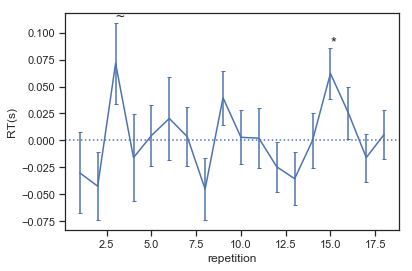

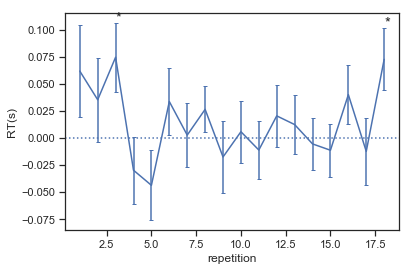

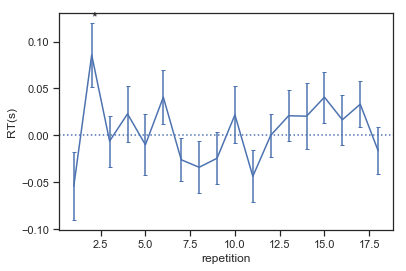

In [17]:
# 1vs 2 difference repetition by pair type
triplet_types = ['rand_AffNeu', 'rand_NeuNeu','rand_AffAff']
first_block_mean_all=[]
second_block_mean_all=[]
first_block_stderr_all=[]
second_block_stderr_all=[]
for type_of_triplet in list(range(len(triplet_types))):

    print(triplet_types[type_of_triplet])
    
    subj_median=df_all_nan[df_all_nan['pair_type']==triplet_types[type_of_triplet]].groupby(['position','repetition','subject'])['RT'].median().to_frame()
    subj_median.reset_index(inplace=True)

    
    posit_1_subj_mean=np.array(subj_median[subj_median['position']==1]['RT'].tolist())
    posit_2_subj_mean=np.array(subj_median[subj_median['position']==2]['RT'].tolist())

    posit_diff_subj = subj_median[subj_median['position']==1]
    posit_diff_subj.drop('position', axis = 1, inplace = True)
    posit_diff_subj['RT']=(posit_1_subj_mean-posit_2_subj_mean).tolist()

    posit_diff_block = posit_diff_subj.groupby('repetition')['RT'].mean().to_frame()['RT'].tolist()
    posit_diff_stderr_block = [sd/sqrt(len(subj)) for sd in posit_diff_subj.groupby('repetition')['RT'].std().to_frame()['RT'].tolist()]

    plt.figure()
    plt.errorbar(x=[x+1 for x in list(range(param['total_rep']))],y=posit_diff_block,yerr=posit_diff_stderr_block,capsize=2)
    plt.ylabel('RT(s)')
    plt.xlabel('repetition')
    # plt.title('mean RT difference (1st-2nd) by repetition')
    plt.axhline(y=[0],linestyle=':')

    print('sig test')
    print('RT by repetition')
    for b in range(param['total_rep']):
        t1, p1 = stats.ttest_rel(posit_diff_subj[posit_diff_subj['repetition']==b]['RT'].dropna(),[0]*len(posit_diff_subj[posit_diff_subj['repetition']==b]['RT'].dropna()))
        if p1 <= 0.005:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'***',fontsize=15)
        elif p1 <= 0.01:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'**',fontsize=15)
        elif p1 <= 0.05:
            print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'*',fontsize=15)
        elif p1 <= 0.1 and p1 > 0.05:
            print('(almost) sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'~',fontsize=15)

    oneWayRepeatedANOVA(posit_diff_subj,['repetition','subject'],'position_diff_RT_'+triplet_types[type_of_triplet]+'.csv')


## Learning onset

p limit: 0.01


Text(0.5, 1.0, '% participants with significant RT difference within pairs')

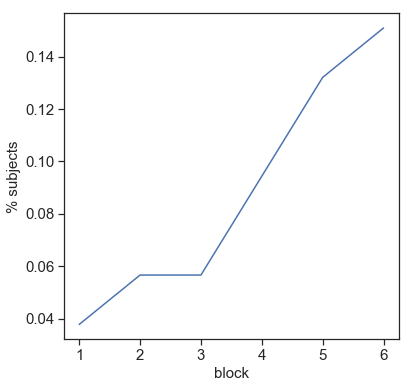

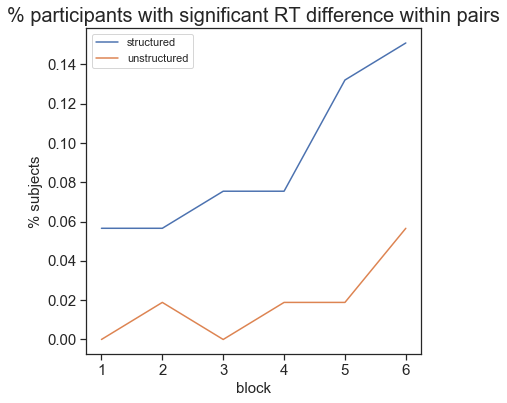

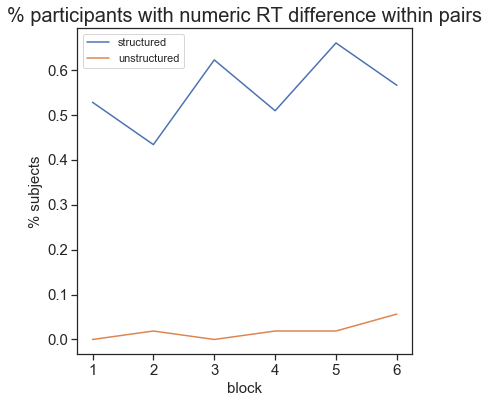

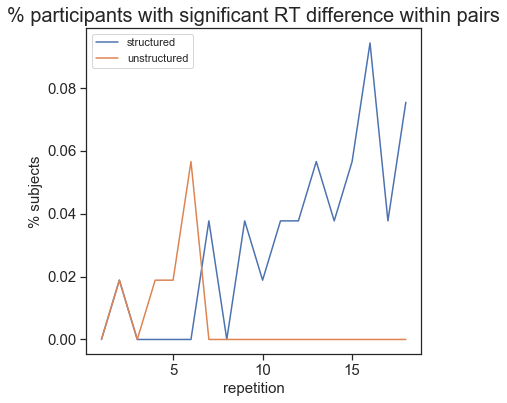

In [18]:
#All pair number of participants significant at each block
warnings.filterwarnings('ignore')
p_value=0.01
print('p limit:', p_value)

count_block = [];
for b in range(param['num_blocks']):
    count = 0
    count_block.append([])
    count_block[b]=0
    df_block = df_pair_correct[df_pair_correct['block']==b]
    for s in range(param['num_participants']):
        df_block_subject = df_block[df_block['subject']==s]
        p1_rt = df_block_subject[df_block['position']==1]['RT']
        p2_rt = df_block_subject[df_block['position']==2]['RT']
        
        t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
#         print(p1)
        if p1 <= p_value:
            count_block[b]=count_block[b]+1
            
count_block=[x/param['num_participants'] for x in count_block]
plt.figure(figsize=(6,6))
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)
plt.ylabel('% subjects', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)

#All pair number of participants significant at each block in structured vs unstructured
warnings.filterwarnings('ignore')
plt.figure(figsize=(6,6))

count_block = [];
for b in range(param['num_blocks']):
    count = 0
    count_block.append([])
    count_block[b]=0
    df_block = df_pair_correct[(df_pair_correct['pair_type']=='AffAff') | (df_pair_correct['pair_type']=='AffNeu') | (df_pair_correct['pair_type']=='NeuAff') | (df_pair_correct['pair_type']=='NeuNeu')]
    df_block = df_block[df_block['block']==b]
    for s in range(param['num_participants']):
        df_block_subject = df_block[df_block['subject']==s]
        p1_rt = df_block_subject[df_block['position']==1]['RT']
        p2_rt = df_block_subject[df_block['position']==2]['RT']
        t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
        if p1 <= p_value:
            count_block[b]=count_block[b]+1
count_block=[x/param['num_participants'] for x in count_block]
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)

count_block = [];
for b in range(param['num_blocks']):
    count = 0
    count_block.append([])
    count_block[b]=0
    df_block = df_pair_correct[(df_pair_correct['pair_type']=='rand_AffAff') | (df_pair_correct['pair_type']=='rand_AffNeu') | (df_pair_correct['pair_type']=='rand_NeuNeu')]
    df_block = df_block[df_block['block']==b]
    for s in range(param['num_participants']):
        df_block_subject = df_block[df_block['subject']==s]
        p1_rt = df_block_subject[df_block['position']==1]['RT']
        p2_rt = df_block_subject[df_block['position']==2]['RT']
        t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
        if p1 <= p_value:
            count_block[b]=count_block[b]+1
count_block=[x/param['num_participants'] for x in count_block]

eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)
plt.ylabel('% subjects', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(['structured','unstructured'])
plt.title('% participants with significant RT difference within pairs', fontsize=20)

#number of participants numerically different at each block in structured vs unstructured
warnings.filterwarnings('ignore')
plt.figure(figsize=(6,6))

count_block = [];
for b in range(param['num_blocks']):
    count = 0
    count_block.append([])
    count_block[b]=0
    df_block = df_pair_correct[(df_pair_correct['pair_type']=='AffAff') | (df_pair_correct['pair_type']=='AffNeu') | (df_pair_correct['pair_type']=='NeuAff') | (df_pair_correct['pair_type']=='NeuNeu')]
    df_block = df_block[df_block['block']==b]
    for s in range(param['num_participants']):
        df_block_subject = df_block[df_block['subject']==s]
        p1_rt = df_block_subject[df_block['position']==1]['RT']
        p2_rt = df_block_subject[df_block['position']==2]['RT']
        if np.nanmedian(p1_rt) > np.nanmedian(p2_rt):
            count_block[b]=count_block[b]+1
count_block=[x/param['num_participants'] for x in count_block]
eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)

count_block = [];
for b in range(param['num_blocks']):
    count = 0
    count_block.append([])
    count_block[b]=0
    df_block = df_pair_correct[(df_pair_correct['pair_type']=='rand_AffAff') | (df_pair_correct['pair_type']=='rand_AffNeu') | (df_pair_correct['pair_type']=='rand_NeuNeu')]
    df_block = df_block[df_block['block']==b]
    for s in range(param['num_participants']):
        df_block_subject = df_block[df_block['subject']==s]
        p1_rt = df_block_subject[df_block['position']==1]['RT']
        p2_rt = df_block_subject[df_block['position']==2]['RT']
        t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
        if p1 <= p_value:
            count_block[b]=count_block[b]+1
count_block=[x/param['num_participants'] for x in count_block]

eb=plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)
plt.ylabel('% subjects', fontsize=15)
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(['structured','unstructured'])
plt.title('% participants with numeric RT difference within pairs', fontsize=20)

#number of participants significant at each repetition in structured vs unstructured
warnings.filterwarnings('ignore')
plt.figure(figsize=(6,6))

count_block = [];
for r in range(param['total_rep']):
    count = 0
    count_block.append([])
    count_block[r]=0
    df_block = df_pair_correct[(df_pair_correct['pair_type']=='AffAff') | (df_pair_correct['pair_type']=='AffNeu') | (df_pair_correct['pair_type']=='NeuAff') | (df_pair_correct['pair_type']=='NeuNeu')]
    df_block = df_block[df_block['repetition']==r]
    for s in range(param['num_participants']):
        df_block_subject = df_block[df_block['subject']==s]
        p1_rt = df_block_subject[df_block['position']==1]['RT']
        p2_rt = df_block_subject[df_block['position']==2]['RT']
        t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
        if p1 <= p_value:
            count_block[r]=count_block[r]+1
count_block=[x/param['num_participants'] for x in count_block]
eb=plt.errorbar(x=[x+1 for x in list(range(param['total_rep']))],y=count_block,capsize=4)

count_block = [];
for r in range(param['total_rep']):
    count = 0
    count_block.append([])
    count_block[r]=0
    df_block = df_pair_correct[(df_pair_correct['pair_type']=='rand_AffAff') | (df_pair_correct['pair_type']=='rand_AffNeu') | (df_pair_correct['pair_type']=='rand_NeuNeu')]
    df_block = df_block[df_block['block']==r]
    for s in range(param['num_participants']):
        df_block_subject = df_block[df_block['subject']==s]
        p1_rt = df_block_subject[df_block['position']==1]['RT']
        p2_rt = df_block_subject[df_block['position']==2]['RT']
        t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
        if p1 <= p_value:
            count_block[r]=count_block[r]+1
count_block=[x/param['num_participants'] for x in count_block]

eb=plt.errorbar(x=[x+1 for x in list(range(param['total_rep']))],y=count_block,capsize=4)
plt.ylabel('% subjects', fontsize=15)
plt.xlabel('repetition', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(['structured','unstructured'])
plt.title('% participants with significant RT difference within pairs', fontsize=20)





p limit: 0.01


Text(0.5, 1.0, '% participants with numeric RT difference within pairs')

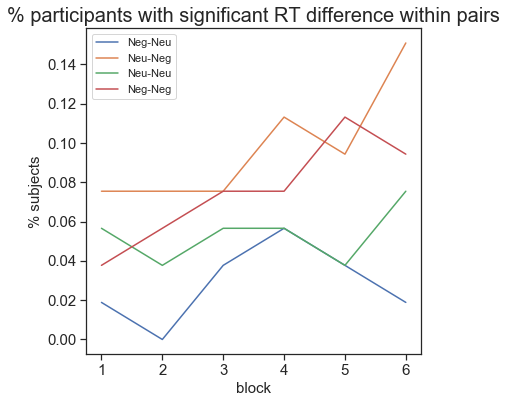

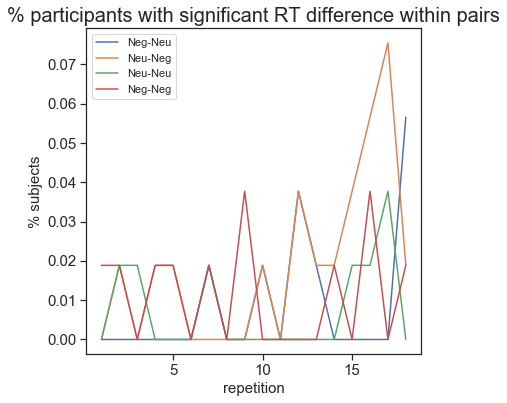

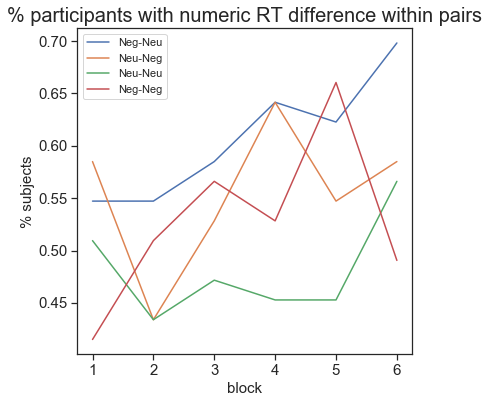

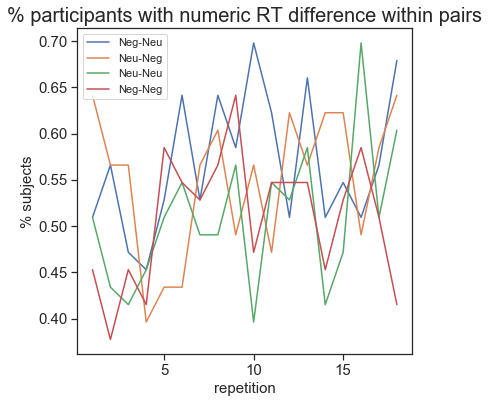

In [19]:
#Structured pair number of participants significant at each block
# triplet_types = ['AffNeu', 'NeuAff', 'NeuNeu','AffAff','rand_NeuNeu','rand_AffNeu','rand_AffAff']
p_value=0.01
print('p limit:', p_value)

#significant difference 

triplet_types = ['AffNeu', 'NeuAff', 'NeuNeu','AffAff']
plt.figure(figsize=(6,6))
for type_of_triplet in triplet_types:
    count_block = [];
    for b in range(param['num_blocks']):
        count_block.append([])
        count_block[b]=0
        df_block = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block = df_block[df_block['block']==b]
        for s in range(param['num_participants']):
            df_block_subject = df_block[df_block['subject']==s]
            p1_rt = df_block_subject[df_block['position']==1]['RT']
            p2_rt = df_block_subject[df_block['position']==2]['RT']
            t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
            if p1 <= p_value:
                count_block[b]=count_block[b]+1

    count_block=[x/param['num_participants'] for x in count_block]
    plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)
plt.ylabel('% subjects', fontsize=15)
plt.legend(['Neg-Neu', 'Neu-Neg', 'Neu-Neu','Neg-Neg'])
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('% participants with significant RT difference within pairs', fontsize=20)

#number of participants significant at each block
# triplet_types = ['AffNeu', 'NeuAff', 'NeuNeu','AffAff','rand_NeuNeu','rand_AffNeu','rand_AffAff']
triplet_types = ['AffNeu', 'NeuAff', 'NeuNeu','AffAff']
plt.figure(figsize=(6,6))
for type_of_triplet in triplet_types:
    count_block = [];
    for r in range(param['total_rep']):
        count_block.append([])
        count_block[r]=0
        df_block = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block = df_block[df_block['repetition']==r]
        for s in range(param['num_participants']):
            df_block_subject = df_block[df_block['subject']==s]
            p1_rt = df_block_subject[df_block['position']==1]['RT']
            p2_rt = df_block_subject[df_block['position']==2]['RT']
            t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
            if p1 <= p_value:
                count_block[r]=count_block[r]+1

    count_block=[x/param['num_participants'] for x in count_block]
    plt.errorbar(x=[x+1 for x in list(range(param['total_rep']))],y=count_block,capsize=4)
plt.ylabel('% subjects', fontsize=15)
plt.legend(['Neg-Neu', 'Neu-Neg', 'Neu-Neu','Neg-Neg'])
plt.xlabel('repetition', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('% participants with significant RT difference within pairs', fontsize=20)

#numeric difference

plt.figure(figsize=(6,6))
for type_of_triplet in triplet_types:
    count_block = [];
    for b in range(param['num_blocks']):
        count_block.append([])
        count_block[b]=0
        df_block = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block = df_block[df_block['block']==b]
        for s in range(param['num_participants']):
            df_block_subject = df_block[df_block['subject']==s]
            p1_rt = df_block_subject[df_block['position']==1]['RT']
            p2_rt = df_block_subject[df_block['position']==2]['RT']
            if np.nanmedian(p1_rt) > np.nanmedian(p2_rt):
                count_block[b]=count_block[b]+1

    count_block=[x/param['num_participants'] for x in count_block]
    plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)
plt.ylabel('% subjects', fontsize=15)
plt.legend(['Neg-Neu', 'Neu-Neg', 'Neu-Neu','Neg-Neg'])
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('% participants with numeric RT difference within pairs', fontsize=20)

plt.figure(figsize=(6,6))
for type_of_triplet in triplet_types:
    count_block = [];
    for r in range(param['total_rep']):
        count_block.append([])
        count_block[r]=0
        df_block = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block = df_block[df_block['repetition']==r]
        for s in range(param['num_participants']):
            df_block_subject = df_block[df_block['subject']==s]
            p1_rt = df_block_subject[df_block['position']==1]['RT']
            p2_rt = df_block_subject[df_block['position']==2]['RT']
            if np.nanmedian(p1_rt) > np.nanmedian(p2_rt):
                count_block[r]=count_block[r]+1

    count_block=[x/param['num_participants'] for x in count_block]
    plt.errorbar(x=[x+1 for x in list(range(param['total_rep']))],y=count_block,capsize=4)
plt.ylabel('% subjects', fontsize=15)
plt.legend(['Neg-Neu', 'Neu-Neg', 'Neu-Neu','Neg-Neg'])
plt.xlabel('repetition', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('% participants with numeric RT difference within pairs', fontsize=20)



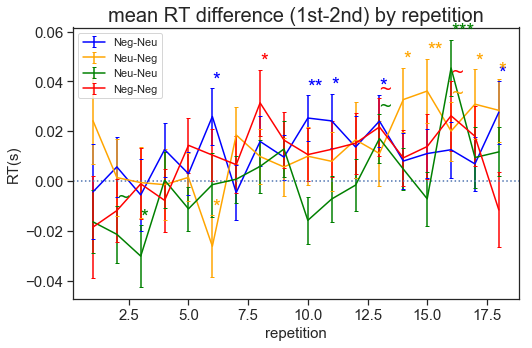

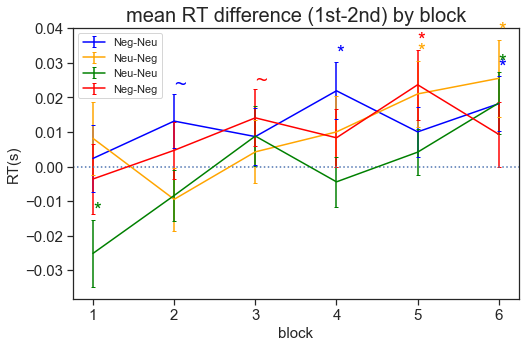

In [20]:
# 1vs 2 difference repetition by pair type
triplet_types = ['AffNeu', 'NeuAff', 'NeuNeu','AffAff']
colors_to_choose = ['blue','orange','green','red']

first_block_mean_all=[]
second_block_mean_all=[]
first_block_stderr_all=[]
second_block_stderr_all=[]
plt.figure(figsize=(8,5))
for type_of_triplet in list(range(len(triplet_types))):

#     print(triplet_types[type_of_triplet])
    
    subj_median=df_correct[df_correct['pair_type']==triplet_types[type_of_triplet]].groupby(['position','repetition','subject'])['RT'].median().to_frame()
    subj_median.reset_index(inplace=True)
    
    posit_1_subj_mean=np.array(subj_median[subj_median['position']==1]['RT'].tolist())
    posit_2_subj_mean=np.array(subj_median[subj_median['position']==2]['RT'].tolist())

    posit_diff_subj = subj_median[subj_median['position']==1]
    posit_diff_subj.drop('position', axis = 1, inplace = True)
    posit_diff_subj['RT']=(posit_1_subj_mean-posit_2_subj_mean).tolist()

    posit_diff_block = posit_diff_subj.groupby('repetition')['RT'].mean().to_frame()['RT'].tolist()
    posit_diff_stderr_block = [sd/sqrt(len(subj)) for sd in posit_diff_subj.groupby('repetition')['RT'].std().to_frame()['RT'].tolist()]

    plt.errorbar(x=[x+1 for x in list(range(param['total_rep']))],y=posit_diff_block,yerr=posit_diff_stderr_block,capsize=2,color = colors_to_choose[type_of_triplet])
    
#     p=np.poly1d(np.polyfit(list(range(param['total_rep'])), posit_diff_block,1))
#     xp=np.linspace(0, 18, 100)
#     plt.plot(list(range(param['total_rep'])), posit_diff_block, '.',color = colors_to_choose[type_of_triplet])
#     plt.plot(xp, p(xp), '-', color = colors_to_choose[type_of_triplet])

#     print('sig test')
#     print('RT by repetition')
    for b in range(param['total_rep']):
        t1, p1 = stats.ttest_rel(posit_diff_subj[posit_diff_subj['repetition']==b]['RT'],[0]*len(posit_diff_subj[posit_diff_subj['repetition']==b]['RT']))
        if p1 <= 0.005:
#             print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'***',fontsize=20,color = colors_to_choose[type_of_triplet])
        elif p1 <= 0.01:
#             print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'**',fontsize=20,color = colors_to_choose[type_of_triplet])
        elif p1 <= 0.05:
#             print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'*',fontsize=20,color = colors_to_choose[type_of_triplet])
        elif p1 <= 0.1 and p1 > 0.05:
#             print('(almost) sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'~',fontsize=20,color = colors_to_choose[type_of_triplet])

#     oneWayRepeatedANOVA(posit_diff_subj,['repetition','subject'],'position_diff_RT_'+triplet_types[type_of_triplet]+'.csv')
    
plt.ylabel('RT(s)', fontsize=15)
plt.legend(['Neg-Neu', 'Neu-Neg', 'Neu-Neu','Neg-Neg'])
plt.xlabel('repetition', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('mean RT difference (1st-2nd) by repetition', fontsize=20)
plt.axhline(y=[0],linestyle=':')

# 1vs 2 difference block by pair type
triplet_types = ['AffNeu', 'NeuAff', 'NeuNeu','AffAff']
first_block_mean_all=[]
second_block_mean_all=[]
first_block_stderr_all=[]
second_block_stderr_all=[]
plt.figure(figsize=(8,5))
for type_of_triplet in list(range(len(triplet_types))):

#     print(triplet_types[type_of_triplet])
    
    subj_median=df_correct[df_correct['pair_type']==triplet_types[type_of_triplet]].groupby(['position','block','subject'])['RT'].median().to_frame()
    subj_median.reset_index(inplace=True)
    
    posit_1_subj_mean=np.array(subj_median[subj_median['position']==1]['RT'].tolist())
    posit_2_subj_mean=np.array(subj_median[subj_median['position']==2]['RT'].tolist())

    posit_diff_subj = subj_median[subj_median['position']==1]
    posit_diff_subj.drop('position', axis = 1, inplace = True)
    posit_diff_subj['RT']=(posit_1_subj_mean-posit_2_subj_mean).tolist()

    posit_diff_block = posit_diff_subj.groupby('block')['RT'].mean().to_frame()['RT'].tolist()
    posit_diff_stderr_block = [sd/sqrt(len(subj)) for sd in posit_diff_subj.groupby('block')['RT'].std().to_frame()['RT'].tolist()]

    plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=posit_diff_block,yerr=posit_diff_stderr_block,capsize=2,color = colors_to_choose[type_of_triplet])

#     print('sig test')
#     print('RT by block')
    for b in range(param['num_blocks']):
        t1, p1 = stats.ttest_rel(posit_diff_subj[posit_diff_subj['block']==b]['RT'],[0]*len(posit_diff_subj[posit_diff_subj['block']==b]['RT']))
        if p1 <= 0.005:
#             print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'***',fontsize=20,color = colors_to_choose[type_of_triplet])
        elif p1 <= 0.01:
#             print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'**',fontsize=20,color = colors_to_choose[type_of_triplet])
        elif p1 <= 0.05:
#             print('sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'*',fontsize=20,color = colors_to_choose[type_of_triplet])
        elif p1 <= 0.1 and p1 > 0.05:
#             print('(almost) sig at','B',b," p = " + str(p1))
            plt.text(b+1, posit_diff_block[b]+posit_diff_stderr_block[b]+0.001,'~',fontsize=20,color = colors_to_choose[type_of_triplet])

#     oneWayRepeatedANOVA(posit_diff_subj,['block','subject'],'position_diff_RT_'+triplet_types[type_of_triplet]+'.csv')

plt.ylabel('RT(s)', fontsize=15)
plt.legend(['Neg-Neu', 'Neu-Neg', 'Neu-Neu','Neg-Neg'])
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('mean RT difference (1st-2nd) by block', fontsize=20)
plt.axhline(y=[0],linestyle=':')

Text(0.5, 1.0, 'numeric RT difference for every 2 blocks in reference to the last 2 blocks')

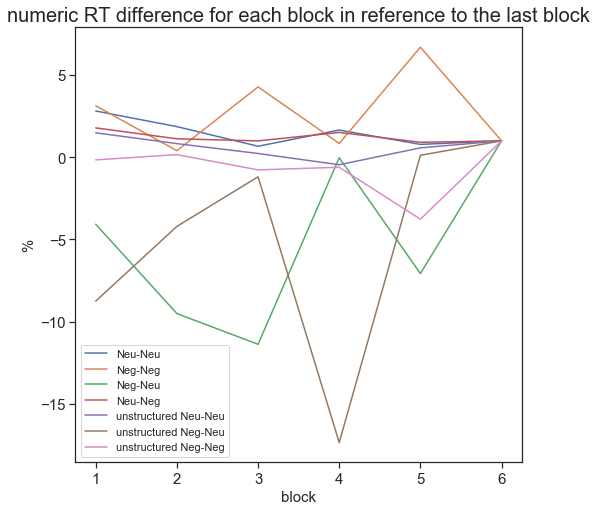

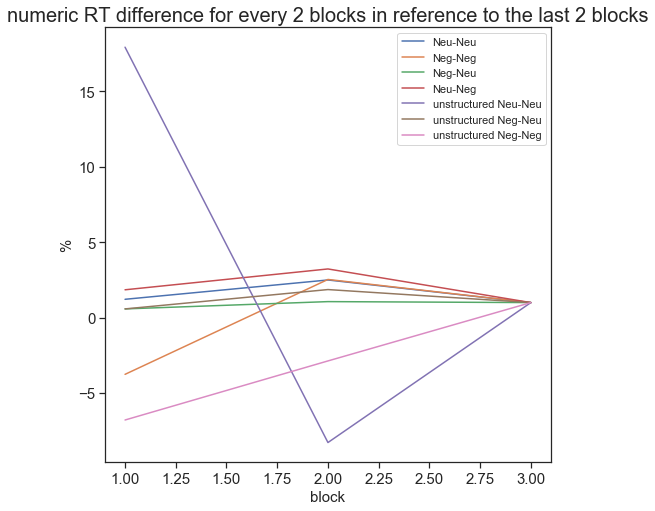

In [21]:
#RT difference in reference to the last block

#number of participants significant at each block
triplet_types = ['NeuNeu','AffAff','AffNeu', 'NeuAff','rand_NeuNeu','rand_AffNeu','rand_AffAff']
# triplet_types = ['NeuNeu','AffAff','AffNeu', 'NeuAff']
plt.figure(figsize=(8,8))
for type_of_triplet in triplet_types:
    averaged_block_pctg = [];    
    for b in range(param['num_blocks']):
        averaged_block_pctg.append([])
        
        df_block = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block = df_block[df_block['block']==b]
        
        df_block6 = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block6 = df_block6[df_block6['block']==5]
        
        subj_pctg = []
        for s in range(param['num_participants']):
            
            df_block_subject = df_block[df_block['subject']==s]
            p1_rt = df_block_subject[df_block['position']==1]['RT']
            p2_rt = df_block_subject[df_block['position']==2]['RT']
            
            df_block6_subject = df_block6[df_block6['subject']==s]
            p1_6_rt = df_block6_subject[df_block6['position']==1]['RT']
            p2_6_rt = df_block6_subject[df_block6['position']==2]['RT']
            
            subj_pctg.extend([(np.nanmedian(p1_rt) - np.nanmedian(p2_rt))/(np.nanmedian(p1_6_rt) - np.nanmedian(p2_6_rt))])
        
        averaged_block_pctg[b]=np.nanmean(subj_pctg)

    plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=averaged_block_pctg,capsize=4)
    
plt.ylabel('%', fontsize=15)
plt.legend(['Neu-Neu', 'Neg-Neg', 'Neg-Neu','Neu-Neg','unstructured Neu-Neu','unstructured Neg-Neu','unstructured Neg-Neg'])
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('numeric RT difference for each block in reference to the last block', fontsize=20)


#number of participants significant at every 2 blocks
triplet_types = ['NeuNeu','AffAff','AffNeu', 'NeuAff','rand_NeuNeu','rand_AffNeu','rand_AffAff']
# triplet_types = ['NeuNeu','AffAff','AffNeu', 'NeuAff']
plt.figure(figsize=(8,8))
blocks = [[0,1],[2,3],[4,5]]
for type_of_triplet in triplet_types:
    averaged_block_pctg = [];    
    for b in range(len(blocks)):
        averaged_block_pctg.append([])
        
        df_block = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block = df_block[(df_block['block']==blocks[b][0]) | (df_block['block']==blocks[b][1])]
        
        df_block6 = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block6 = df_block6[(df_block6['block']==blocks[2][0]) | (df_block6['block']==blocks[2][1])]
        
        subj_pctg = []
        for s in range(param['num_participants']):
            
            df_block_subject = df_block[df_block['subject']==s]
            p1_rt = df_block_subject[df_block['position']==1]['RT']
            p2_rt = df_block_subject[df_block['position']==2]['RT']
            
            df_block6_subject = df_block6[df_block6['subject']==s]
            p1_6_rt = df_block6_subject[df_block6['position']==1]['RT']
            p2_6_rt = df_block6_subject[df_block6['position']==2]['RT']
            
            subj_pctg.extend([(np.nanmedian(p1_rt) - np.nanmedian(p2_rt))/(np.nanmedian(p1_6_rt) - np.nanmedian(p2_6_rt))])
        
        averaged_block_pctg[b]=np.nanmean(subj_pctg)

    plt.errorbar(x=[x+1 for x in list(range(len(blocks)))],y=averaged_block_pctg,capsize=4)
    
plt.ylabel('%', fontsize=15)
plt.legend(['Neu-Neu', 'Neg-Neg', 'Neg-Neu','Neu-Neg','unstructured Neu-Neu','unstructured Neg-Neu','unstructured Neg-Neg'])
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('numeric RT difference for every 2 blocks in reference to the last 2 blocks', fontsize=20)



In [22]:
# 1-way anova at each block
# for b in range(len(cont_block_data)):
for b in [[0,1],[2,3],[4,5]]:
    print('block',b)
    
    subj_median=df_correct[(df_correct['pair_type']=='NeuNeu') | (df_correct['pair_type']=='NeuAff') | (df_correct['pair_type']=='AffNeu') | (df_correct['pair_type']=='AffAff')]

    subj_median=subj_median[(df_correct['block']==b[0]) | (df_correct['block']==b[1])]

    subj_median['block'][subj_median['block'] == b[1]] = b[0]
    
    subj_median=subj_median.groupby(['pair_type','position','subject'])['RT'].median().to_frame()
    subj_median.reset_index(inplace=True)

    twoWayRepeatedANOVA(subj_median,['pair_type','position','subject'],'position+Structuredpairtype_medianRT_b'+str(b)+'.csv')




block [0, 1]
                      Anova
                   Num DF  Den DF  F Value Pr > F
-------------------------------------------------
pair_type          3.0000 156.0000  2.5920 0.0547
position           1.0000  52.0000  0.0102 0.9198
pair_type:position 3.0000 156.0000  2.2371 0.0861

block [2, 3]
                      Anova
                   Num DF  Den DF  F Value Pr > F
-------------------------------------------------
pair_type          3.0000 156.0000  1.0017 0.3938
position           1.0000  52.0000  4.6182 0.0363
pair_type:position 3.0000 156.0000  0.6960 0.5558

block [4, 5]
                      Anova
                   Num DF  Den DF  F Value Pr > F
-------------------------------------------------
pair_type          3.0000 156.0000  2.0728 0.1061
position           1.0000  52.0000  6.7776 0.0120
pair_type:position 3.0000 156.0000  1.1080 0.3477



Text(0.5, 1.0, '% participants with significant RT difference within pairs')

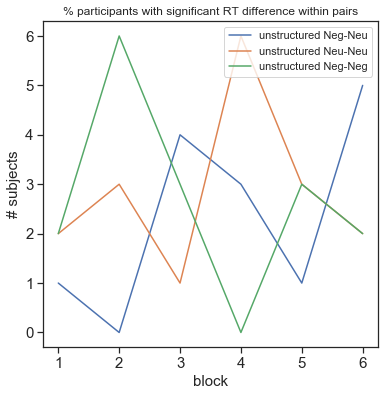

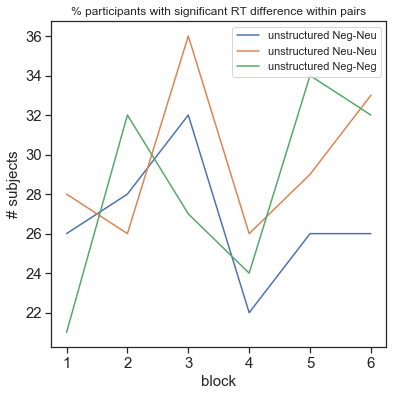

In [23]:
#Unstructured pair number of participants significant at each block
triplet_types = ['rand_AffNeu', 'rand_NeuNeu','rand_AffAff']

plt.figure(figsize=(6,6))
for type_of_triplet in triplet_types:
    count_block = [];
    for b in range(param['num_blocks']):
        count = 0
        count_block.append([])
        count_block[b]=0
        df_block = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block = df_block[df_block['block']==b]
        for s in range(param['num_participants']):
            df_block_subject = df_block[df_block['subject']==s]
            p1_rt = df_block_subject[df_block['position']==1]['RT']
            p2_rt = df_block_subject[df_block['position']==2]['RT']
            t1, p1 = stats.ttest_rel(p1_rt,p2_rt)
            if p1 <= 0.05:
                count_block[b]=count_block[b]+1
                
    plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)
plt.ylabel('# subjects', fontsize=15)
plt.legend(['unstructured Neg-Neu','unstructured Neu-Neu','unstructured Neg-Neg'])
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('% participants with significant RT difference within pairs')

plt.figure(figsize=(6,6))
for type_of_triplet in triplet_types:
    count_block = [];
    for b in range(param['num_blocks']):
        count = 0
        count_block.append([])
        count_block[b]=0
        df_block = df_pair_correct[df_pair_correct['pair_type']==type_of_triplet]
        df_block = df_block[df_block['block']==b]
        for s in range(param['num_participants']):
            df_block_subject = df_block[df_block['subject']==s]
            p1_rt = df_block_subject[df_block['position']==1]['RT']
            p2_rt = df_block_subject[df_block['position']==2]['RT']
            if np.nanmedian(p1_rt) > np.nanmedian(p2_rt):
                count_block[b]=count_block[b]+1
                
    plt.errorbar(x=[x+1 for x in list(range(param['num_blocks']))],y=count_block,capsize=4)
plt.ylabel('# subjects', fontsize=15)
plt.legend(['unstructured Neg-Neu','unstructured Neu-Neu','unstructured Neg-Neg'])
plt.xlabel('block', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('% participants with significant RT difference within pairs')

## Correlation

AffNeu
NeuAff
NeuNeu
AffAff
rand_AffNeu
rand_NeuNeu
rand_AffAff


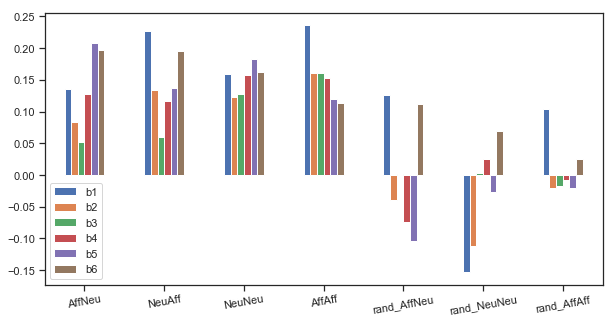

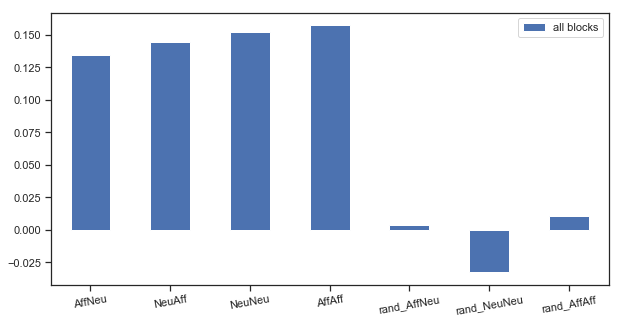

In [134]:
# triplet_types = ['BN','NB','NN','BB','NN_rand','BB_rand','BN_rand']
triplet_types = ['AffNeu', 'NeuAff', 'NeuNeu','AffAff','rand_AffNeu', 'rand_NeuNeu','rand_AffAff']

block_corr_all=[[],[],[],[],[],[],[]]
for type_of_triplet in list(range(len(triplet_types))):
    print(triplet_types[type_of_triplet])
    
    block_corr=[]
    for b in list(range(param['num_blocks'])):
        subj_block_corr=[]
        for s in list(range(len(subj))):
            first_block_rt = df_pair_correct[(df_pair_correct['pair_type'] == triplet_types[type_of_triplet]) & (df_pair_correct['position'] == 1) & (df_pair_correct['block'] == b) & (df_pair_correct['subject'] == s)]['RT'].tolist()
            second_block_rt = df_pair_correct[(df_pair_correct['pair_type'] == triplet_types[type_of_triplet]) & (df_pair_correct['position'] == 2) & (df_pair_correct['block'] == b) & (df_pair_correct['subject'] == s)]['RT'].tolist()

            subj_block_corr_temp = np.corrcoef(first_block_rt,second_block_rt)
            subj_block_corr.append(subj_block_corr_temp[0][1])
            
        block_corr = np.nanmean(subj_block_corr)
        block_corr_all[type_of_triplet].append(block_corr)

block_corr_all_df=pd.DataFrame(index=triplet_types, columns=['block 1','block 2','block 3','block 4','block 5','block 6'])
block_corr_all_df[:]=block_corr_all
block_corr_all_df.plot(kind='bar',rot=10,figsize=(10,5))

block_corr_all_df_avg = block_corr_all_df.mean(axis = 1).to_frame()
block_corr_all_df_avg.rename(columns={0: 'all blocks'},inplace=True)
block_corr_all_df_avg.plot(kind='bar',rot=10,figsize=(10,5))


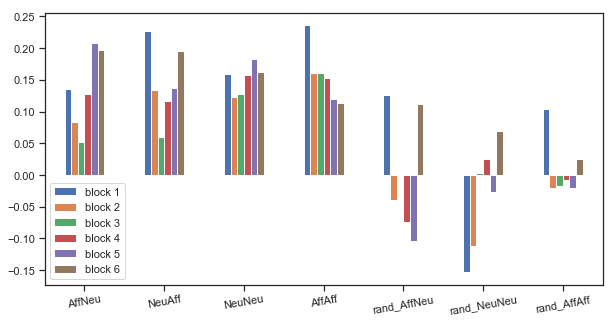

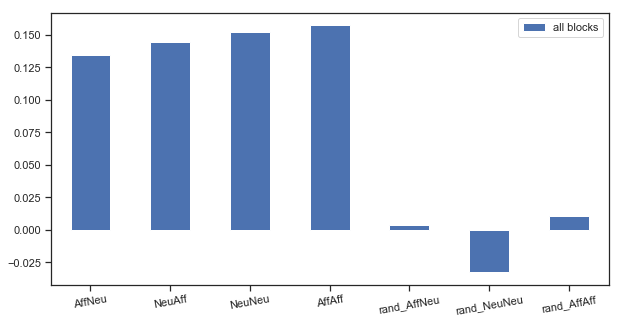

In [135]:
block_corr_all_df=pd.DataFrame(index=triplet_types, columns=['block 1','block 2','block 3','block 4','block 5','block 6'])
block_corr_all_df[:]=block_corr_all
block_corr_all_df.plot(kind='bar',rot=10,figsize=(10,5))

block_corr_all_df_avg = block_corr_all_df.mean(axis = 1).to_frame()
block_corr_all_df_avg.rename(columns={0: 'all blocks'},inplace=True)
block_corr_all_df_avg.plot(kind='bar',rot=10,figsize=(10,5))